In [3]:
##import the essential libraries
!pip install pandas
!pip install seaborn
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 2.0 MB/s eta 0:00:003.6 MB/s eta 0:00:01m
  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 10.5 MB/s eta 0:00:00m eta 0:00:010:01:01


In [5]:
##read dataset . the dataset is downloaded from kaggle
df=pd.read_csv('soil_analysis_data.csv')

In [6]:
df.head()

District            Soil Type  pH Level  Organic Matter (%)  \
0    Jaipur  Chalky (Calcareous)  6.546096            1.569807   
1  Bhilwara          Nitrogenous  6.832259            2.243018   
2   Jodhpur                Sandy  7.453182            2.662898   
3    Jaipur                 Clay  8.019189            1.240327   
4    Jaipur                Sandy  8.100131            1.768419   

   Nitrogen Content (kg/ha)  Phosphorus Content (kg/ha)  \
0                 27.931972                   29.438438   
1                 22.263480                   25.413455   
2                 23.564182                   13.014409   
3                 15.839222                   17.744206   
4                 27.942867                   25.769504   

   Potassium Content (kg/ha)  
0                  42.782766  
1                  37.644377  
2                  37.082003  
3                  42.758704  
4                  30.651292

In [7]:
df.columns

Index(['District', 'Soil Type', 'pH Level', 'Organic Matter (%)',
       'Nitrogen Content (kg/ha)', 'Phosphorus Content (kg/ha)',
       'Potassium Content (kg/ha)'],
      dtype='object')

In [8]:
df['District'].value_counts()

District
Jodhpur           128
Kota              114
Ajmer             106
Jaipur            103
Udaipur           103
Alwar              98
Sri Ganganagar     93
Bhilwara           85
Hanumangarh        85
Nagaur             85
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   District                    1000 non-null   object 
 1   Soil Type                   1000 non-null   object 
 2   pH Level                    1000 non-null   float64
 3   Organic Matter (%)          1000 non-null   float64
 4   Nitrogen Content (kg/ha)    1000 non-null   float64
 5   Phosphorus Content (kg/ha)  1000 non-null   float64
 6   Potassium Content (kg/ha)   1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


In [10]:
df.describe()

pH Level  Organic Matter (%)  Nitrogen Content (kg/ha)  \
count  1000.000000         1000.000000               1000.000000   
mean      7.495453            1.993592                 29.883358   
std       0.517155            0.515340                  5.202697   
min       5.889492            0.155817                 11.994574   
25%       7.157881            1.638911                 26.217325   
50%       7.500129            1.981462                 29.822797   
75%       7.846940            2.345688                 33.232056   
max       9.038430            3.764528                 45.760284   

       Phosphorus Content (kg/ha)  Potassium Content (kg/ha)  
count                 1000.000000                1000.000000  
mean                    19.729932                  39.877907  
std                      5.067005                   4.874751  
min                      4.961838                  24.116481  
25%                     16.216471                  36.703917  
50%                     19.913737                  39.796016  
75%                     23.122285                  43.382039  
max                     35.588406                  54.678290

In [11]:
df.isnull().sum()

District                      0
Soil Type                     0
pH Level                      0
Organic Matter (%)            0
Nitrogen Content (kg/ha)      0
Phosphorus Content (kg/ha)    0
Potassium Content (kg/ha)     0
dtype: int64

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [13]:
df.duplicated().sum()

0

In [15]:
df.shape

(1000, 7)

In [16]:
##divide the numeric and categorical columns
num_cols=[]
cat_cols=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [17]:
num_cols

['pH Level',
 'Organic Matter (%)',
 'Nitrogen Content (kg/ha)',
 'Phosphorus Content (kg/ha)',
 'Potassium Content (kg/ha)']

In [18]:
cat_cols

['District', 'Soil Type']

In [20]:
def plot_countplot(data,x):
    plt.figure(figsize=(8,6))
    sns.countplot(data=data,x=x)
    plt.title(f'Countplot for count from each {x}')
    plt.xticks(rotation=45)
    plt.show()

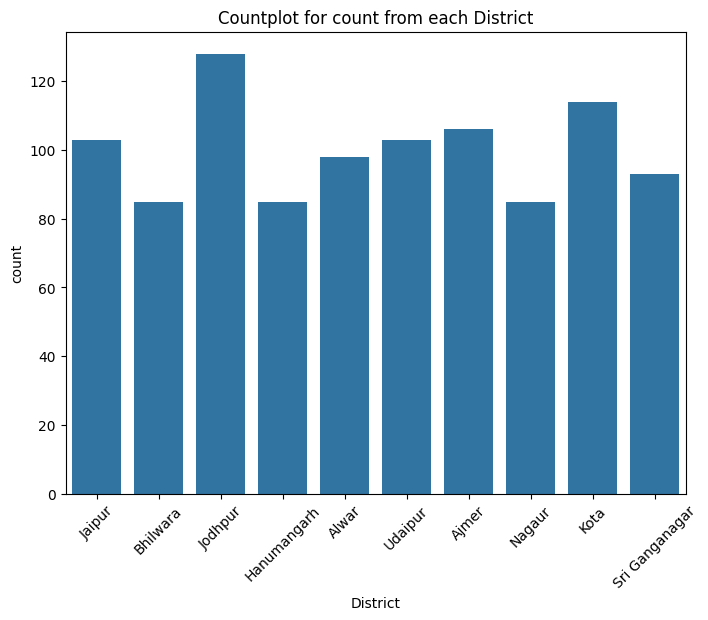

In [22]:
##visualize the count of each district

plot_countplot(df,'District')

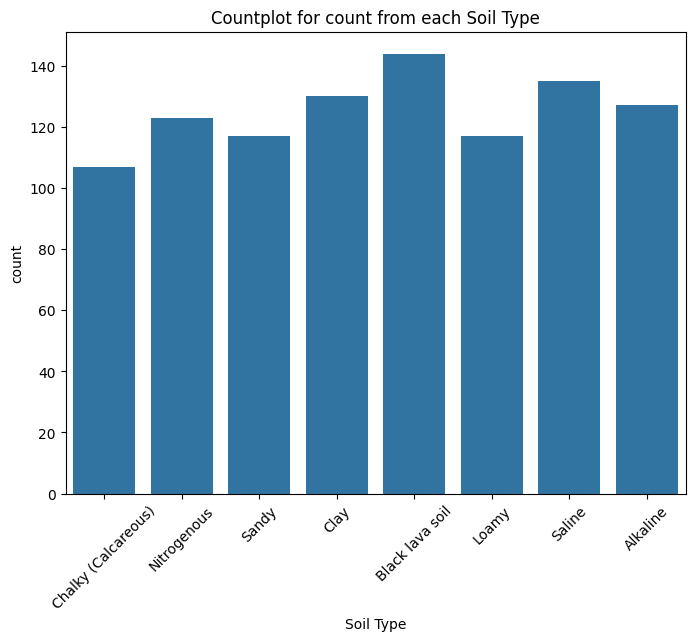

In [25]:
##count of soil type

plot_countplot(df,'Soil Type')

In [26]:
def plot_barplot(data,x,y):
    plt.figure(figsize=(8,6))
    sns.barplot(data=data,x=x,y=y)
    plt.title(f'Barplot {x} vs {y}')
    plt.xticks(rotation=45)
    plt.show()

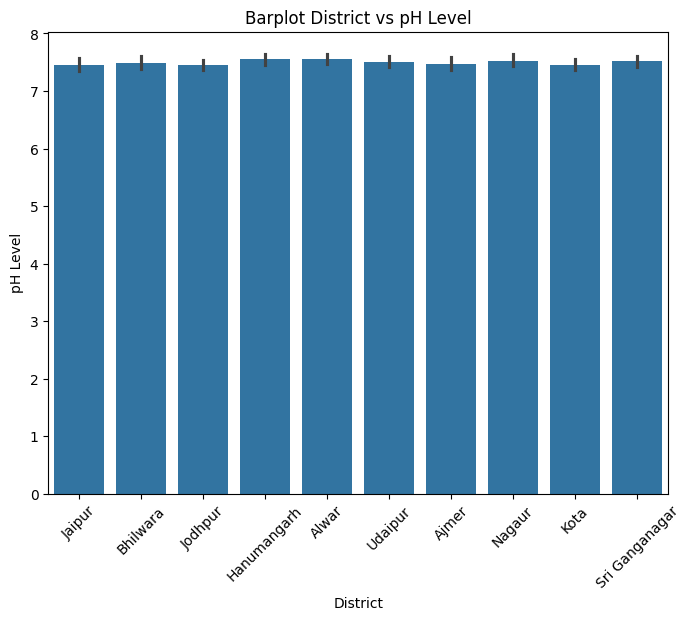

In [28]:
##barplot for district and ph level

plot_barplot(df,'District','pH Level')

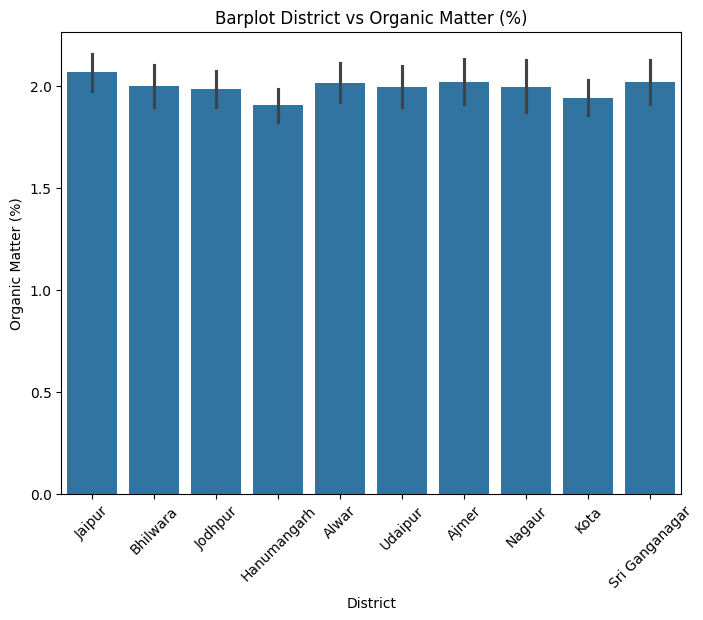

In [31]:
##barplot for district and organic matter

plot_barplot(df,'District','Organic Matter (%)')

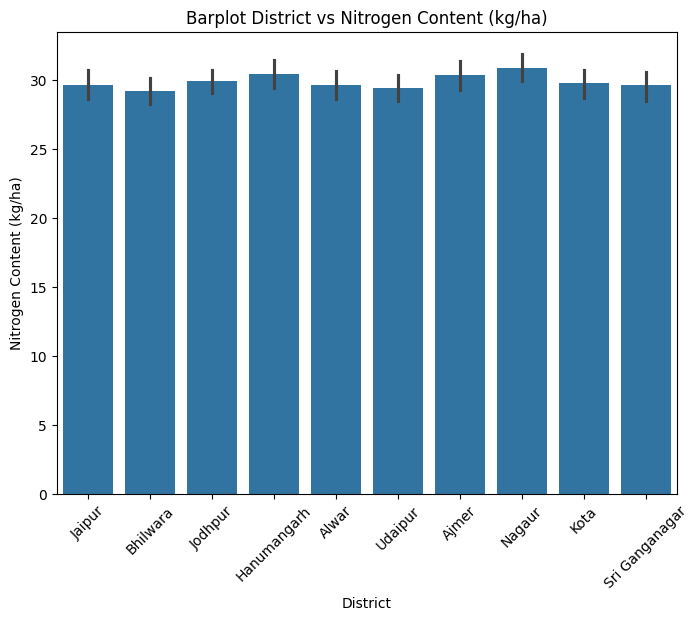

In [32]:
plot_barplot(df,'District','Nitrogen Content (kg/ha)')

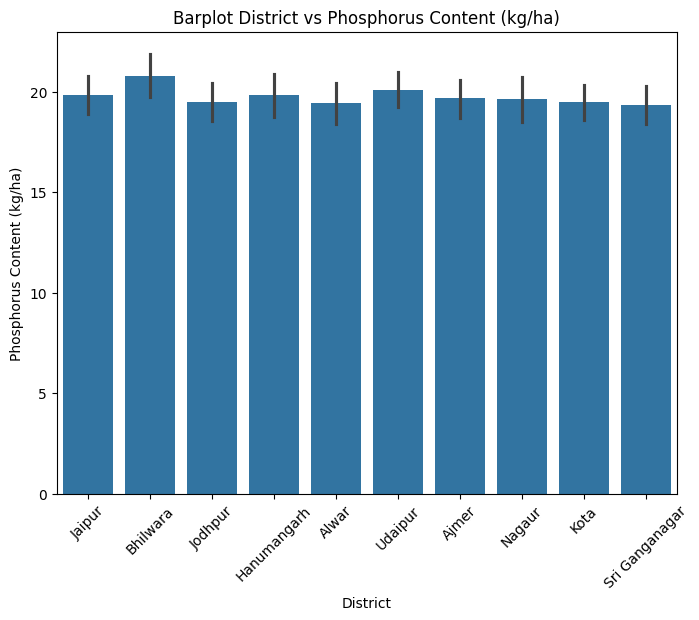

In [35]:
plot_barplot(df,'District','Phosphorus Content (kg/ha)')

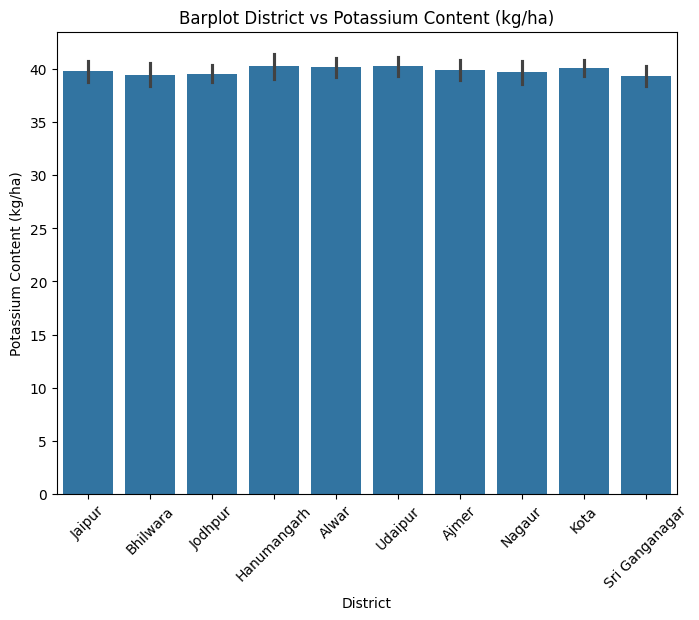

In [36]:
plot_barplot(df,'District','Potassium Content (kg/ha)')

In [40]:
num_cols

['pH Level',
 'Organic Matter (%)',
 'Nitrogen Content (kg/ha)',
 'Phosphorus Content (kg/ha)',
 'Potassium Content (kg/ha)']

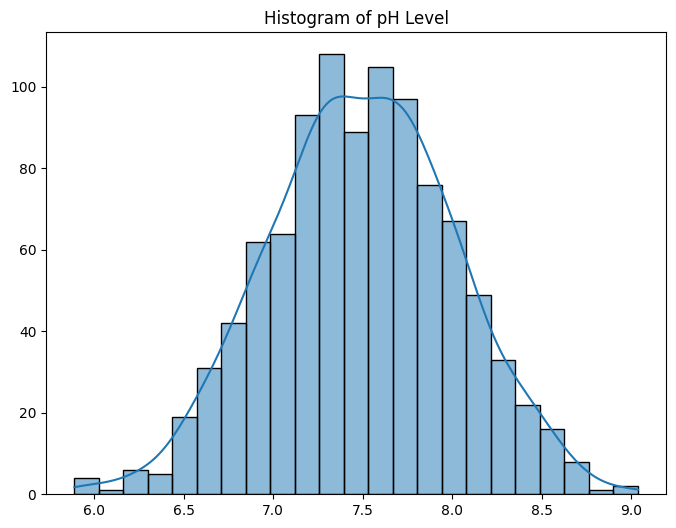

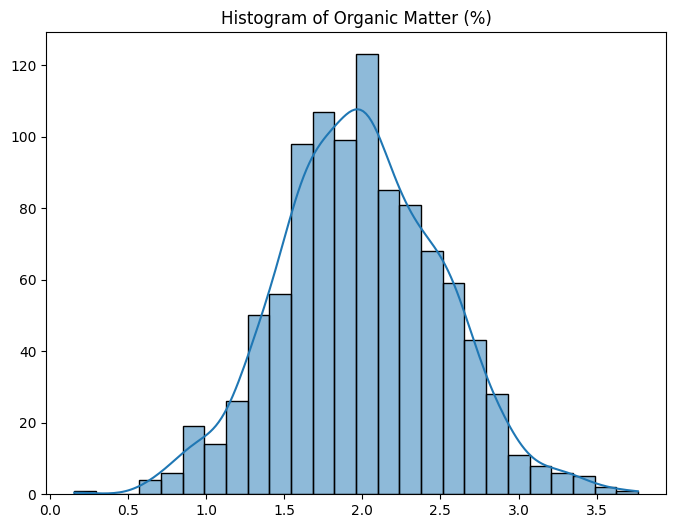

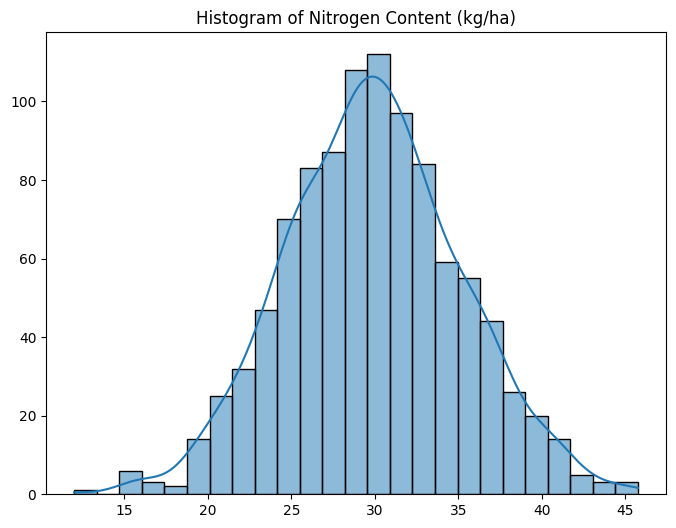

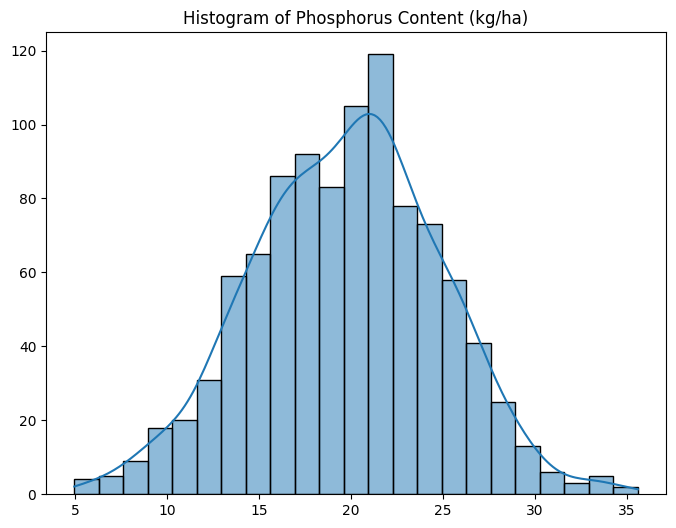

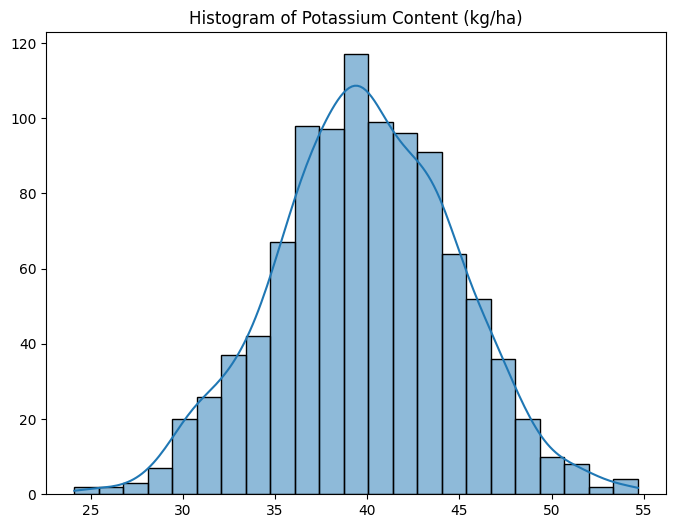

In [45]:
##plot histograms for numerical columns

def plot_histograms_individual(data,columns):
    plt.figure(figsize=(8,6))
    sns.histplot(data=data[columns],kde=True)
    plt.title(f'Histogram of {columns}')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

for col in num_cols:
    plot_histograms_individual(df,col)

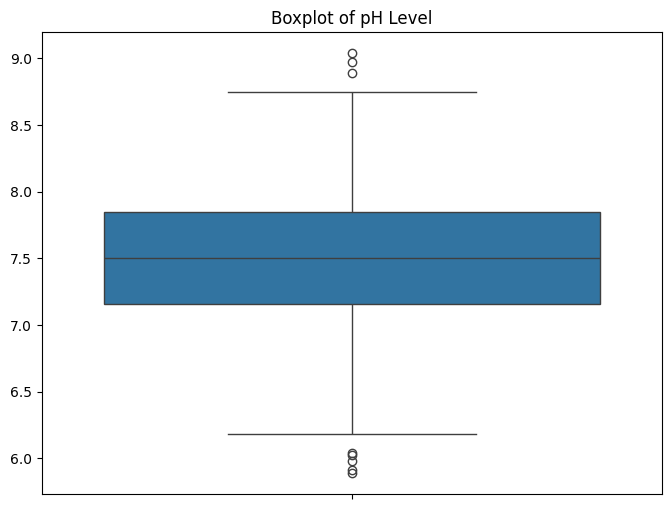

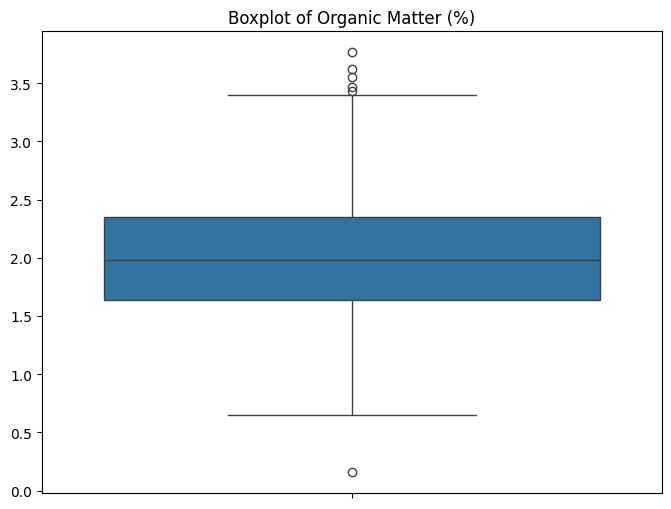

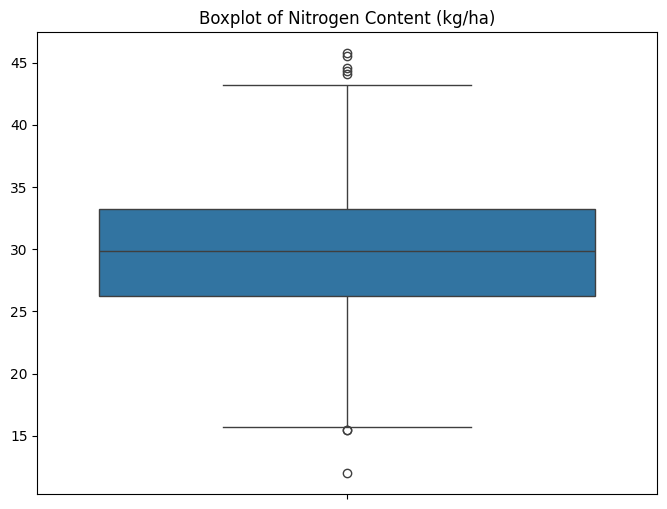

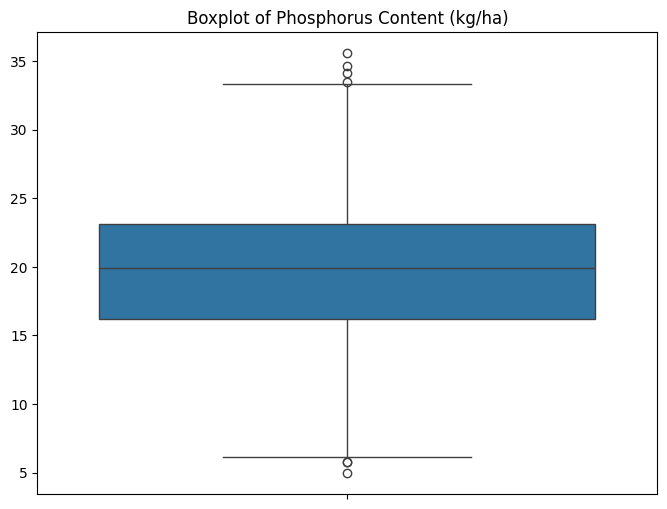

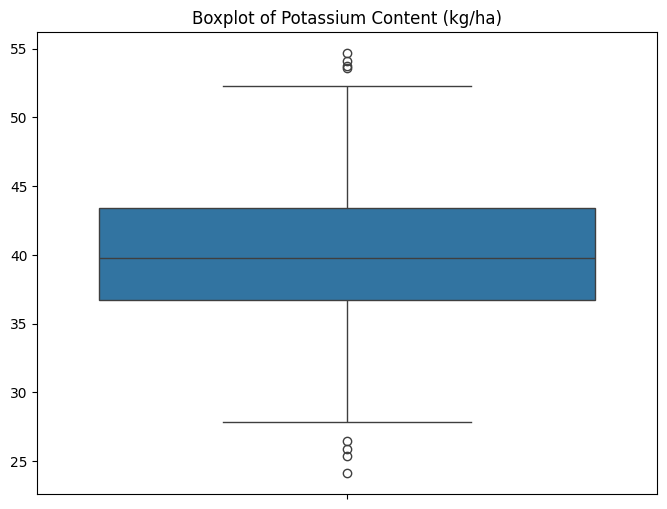

In [47]:
##plot barplots for each individual columns

def plot_boxplot_individual(data,column):
    plt.figure(figsize=(8,6))
    sns.boxplot(data=data[column],orient='v')
    plt.title(f'Boxplot of {column}')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

for col in num_cols:
    plot_boxplot_individual(df,col)

/home/manoj/manoj/signl_major/env/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1600 with 0 Axes>

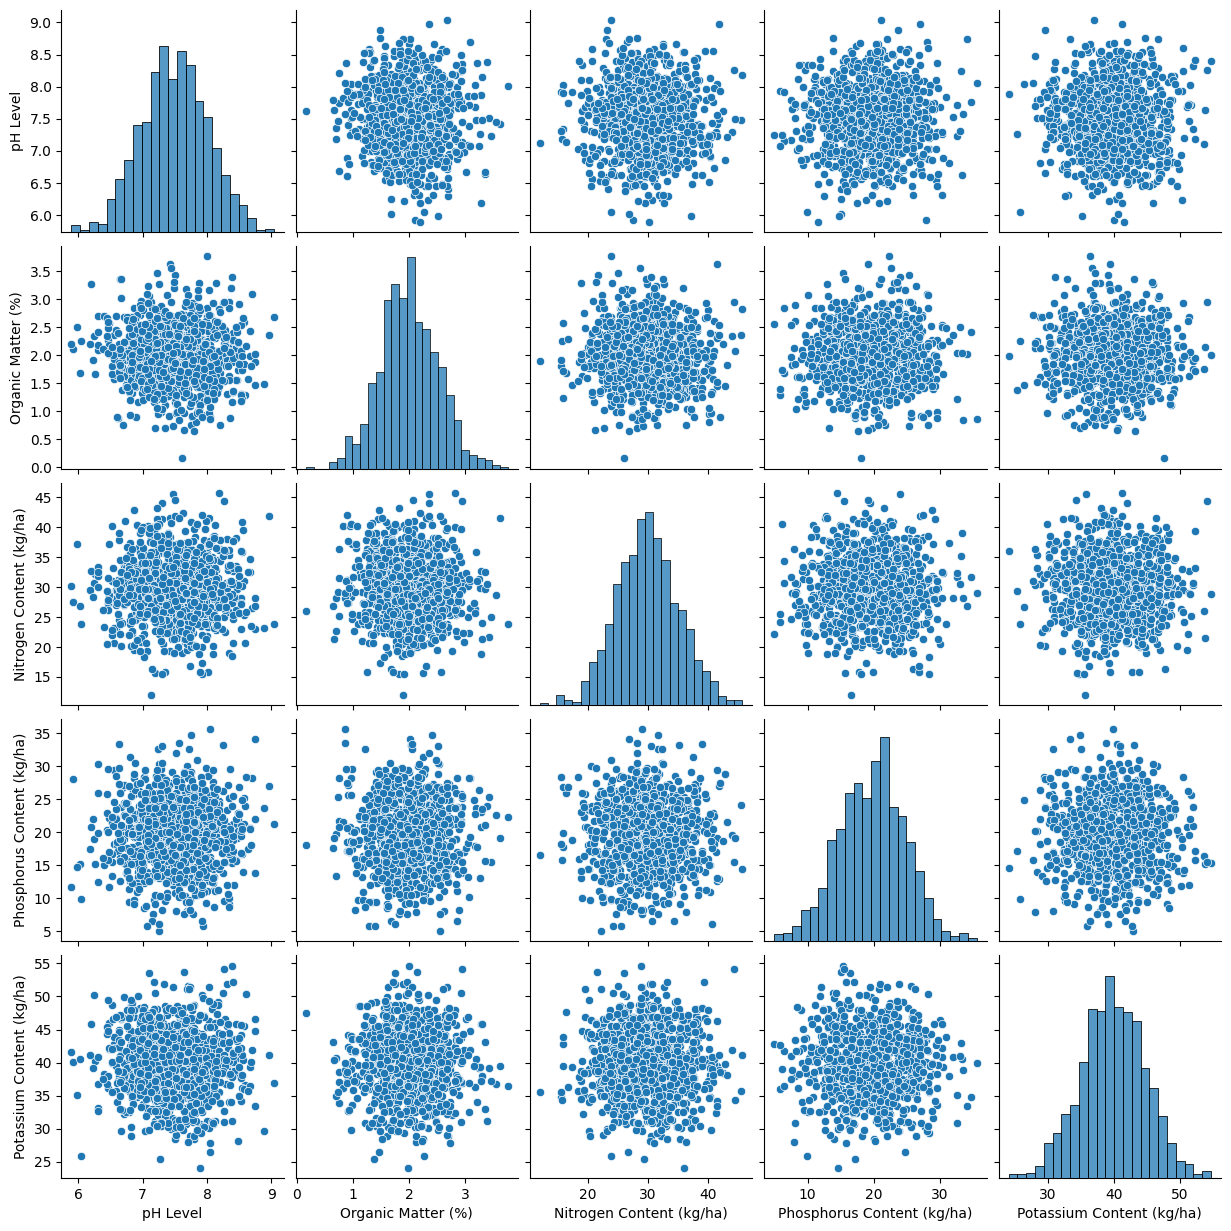

In [48]:
plt.figure(figsize=(20,16))
sns.pairplot(df)

In [49]:
df['District'].unique()

array(['Jaipur', 'Bhilwara', 'Jodhpur', 'Hanumangarh', 'Alwar', 'Udaipur',
       'Ajmer', 'Nagaur', 'Kota', 'Sri Ganganagar'], dtype=object)

In [50]:
##divide the dataset to data frames with respect to district
df_jaipur=df[df['District']=='Jaipur']
df_Bhilwara=df[df['District']=='Bhilwara']
df_Jodhpur=df[df['District']=='Jodhpur']
df_Hanumangarh=df[df['District']=='Hanumangarh']
df_Alwar=df[df['District']=='Alwar']
df_Udaipur=df[df['District']=='Udaipur']
df_Ajmer=df[df['District']=='Ajmer']
df_Nagaur=df[df['District']=='Nagaur']
df_Kota=df[df['District']=='Kota']
df_SriGanganagar=df[df['District']=='Sri Ganganagar']

In [51]:
print('Shape of jaipur',df_jaipur.shape)
print('Shape of bhilwara',df_Bhilwara.shape)
print('Shape of jodhpur',df_Jodhpur.shape)
print('Shape of hanumangarh',df_Hanumangarh.shape)
print('Shape of alwar',df_Alwar.shape)
print('Shape of udaipur',df_Udaipur.shape)
print('Shape of ajmer',df_Ajmer.shape)
print('Shape of nagaur',df_Nagaur.shape)
print('Shape of kota',df_Kota.shape)
print('Shape of sri ganganagar',df_SriGanganagar.shape)

Shape of jaipur (103, 7)
Shape of bhilwara (85, 7)
Shape of jodhpur (128, 7)
Shape of hanumangarh (85, 7)
Shape of alwar (98, 7)
Shape of udaipur (103, 7)
Shape of ajmer (106, 7)
Shape of nagaur (85, 7)
Shape of kota (114, 7)
Shape of sri ganganagar (93, 7)


In [52]:
import warnings
warnings.filterwarnings('ignore')

<h1><b>Analysis on ajmer</b></h1>

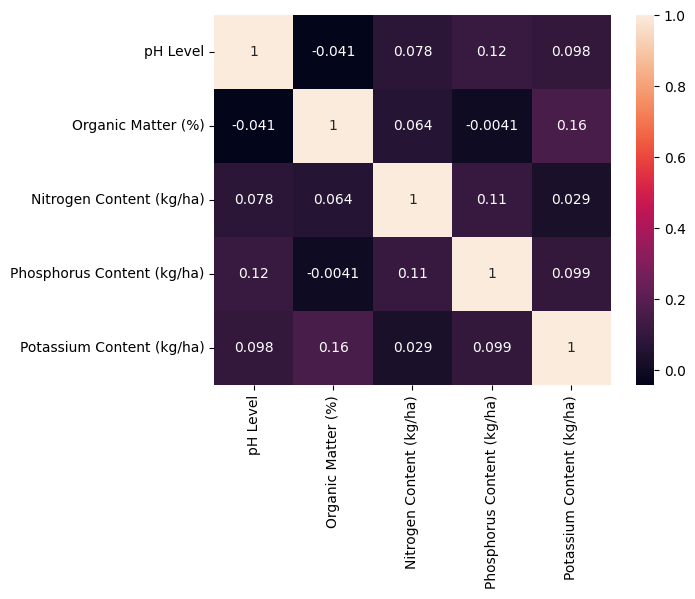

In [62]:
data=df_Ajmer.corr(method='pearson',numeric_only=True)
sns.heatmap(data,annot=True)
plt.show()

In [61]:
df_Ajmer

District            Soil Type  pH Level  Organic Matter (%)  \
12     Ajmer                Loamy  7.658727            1.833570   
21     Ajmer                Loamy  7.680709            1.353429   
24     Ajmer                Sandy  7.258219            1.693917   
28     Ajmer          Nitrogenous  7.923385            0.936386   
41     Ajmer  Chalky (Calcareous)  7.161502            1.613670   
..       ...                  ...       ...                 ...   
935    Ajmer                 Clay  7.128757            1.892731   
956    Ajmer                 Clay  7.306944            2.507610   
974    Ajmer                Loamy  8.263406            2.951279   
987    Ajmer             Alkaline  7.924792            0.890715   
997    Ajmer  Chalky (Calcareous)  7.079614            2.110315   

     Nitrogen Content (kg/ha)  Phosphorus Content (kg/ha)  \
12                  29.533066                   17.353339   
21                  32.861952                   22.253017   
24                  32.456038                   18.209853   
28                  29.504528                   16.985897   
41                  34.150959                   24.501993   
..                        ...                         ...   
935                 11.994574                   16.493552   
956                 30.539920                   33.034296   
974                 44.326060                   15.490037   
987                 42.093889                   27.477291   
997                 28.239561                   21.623791   

     Potassium Content (kg/ha)  
12                   32.427648  
21                   30.650918  
24                   39.303014  
28                   42.161315  
41                   42.256127  
..                         ...  
935                  35.620926  
956                  40.967032  
974                  54.121102  
987                  38.576872  
997                  42.902838  

[106 rows x 7 columns]

In [64]:
df_Ajmer['Soil Type'].value_counts()

Soil Type
Sandy                  18
Black lava soil        18
Saline                 14
Loamy                  12
Clay                   12
Chalky (Calcareous)    11
Alkaline               11
Nitrogenous            10
Name: count, dtype: int64

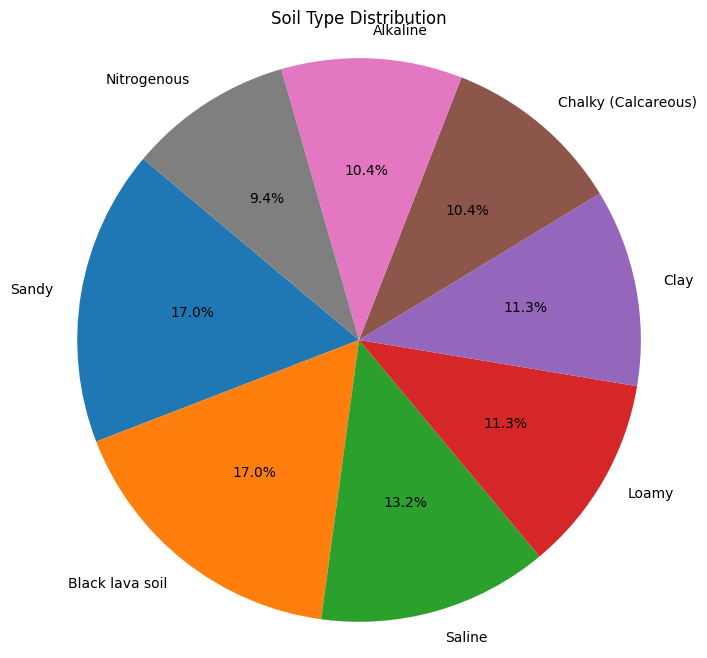

In [66]:
value_counts = df_Ajmer['Soil Type'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100
# Create the pie plot
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
# Add a title
plt.title('Soil Type Distribution')
# Show the plot
plt.show()

In ajmer district the major contribution of sandy and black lava soil with 34% combined

<Axes: xlabel='pH Level', ylabel='Count'>

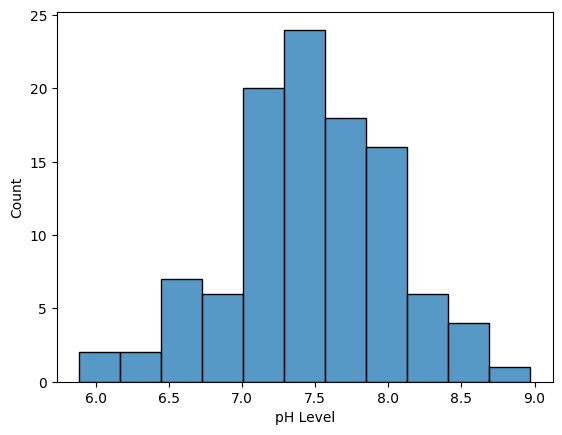

In [67]:
sns.histplot(df_Ajmer['pH Level'])

The average ph level in ajmer district is 7.0-8.0

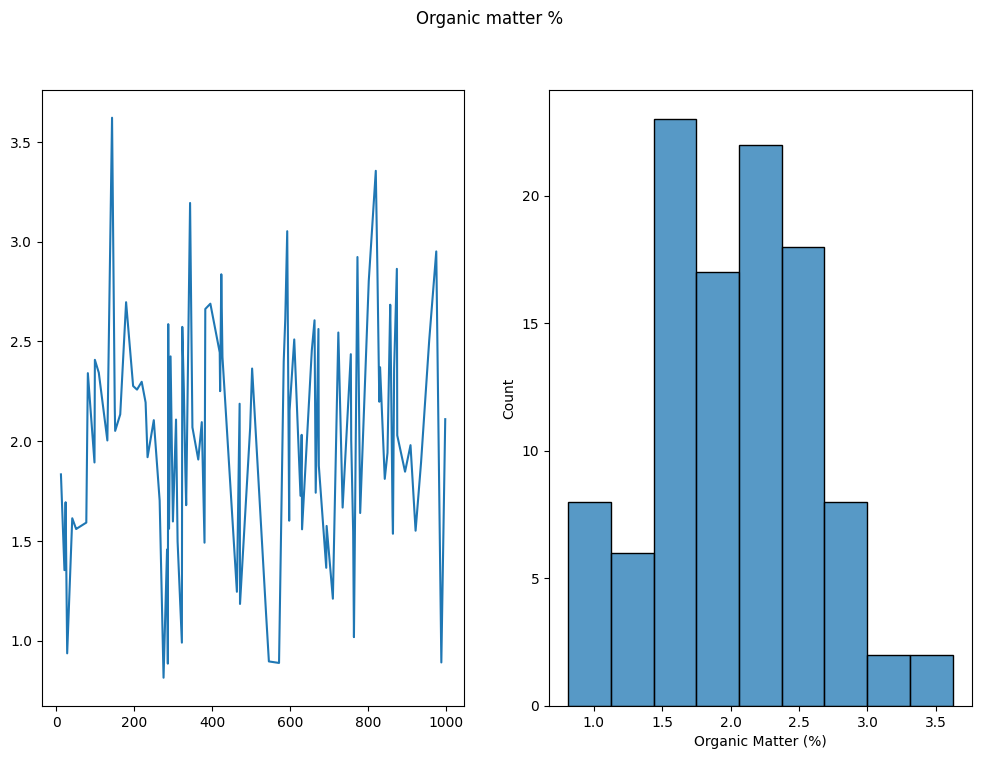

In [69]:
plt.figure(figsize=(12,8))
plt.suptitle('Organic matter % ')
plt.subplot(1,2,1)
plt.plot(df_Ajmer['Organic Matter (%)'])
plt.subplot(1,2,2)
sns.histplot(df_Ajmer['Organic Matter (%)'])
plt.show()

Text(0.5, 1.0, 'pottasium kg per hectare')

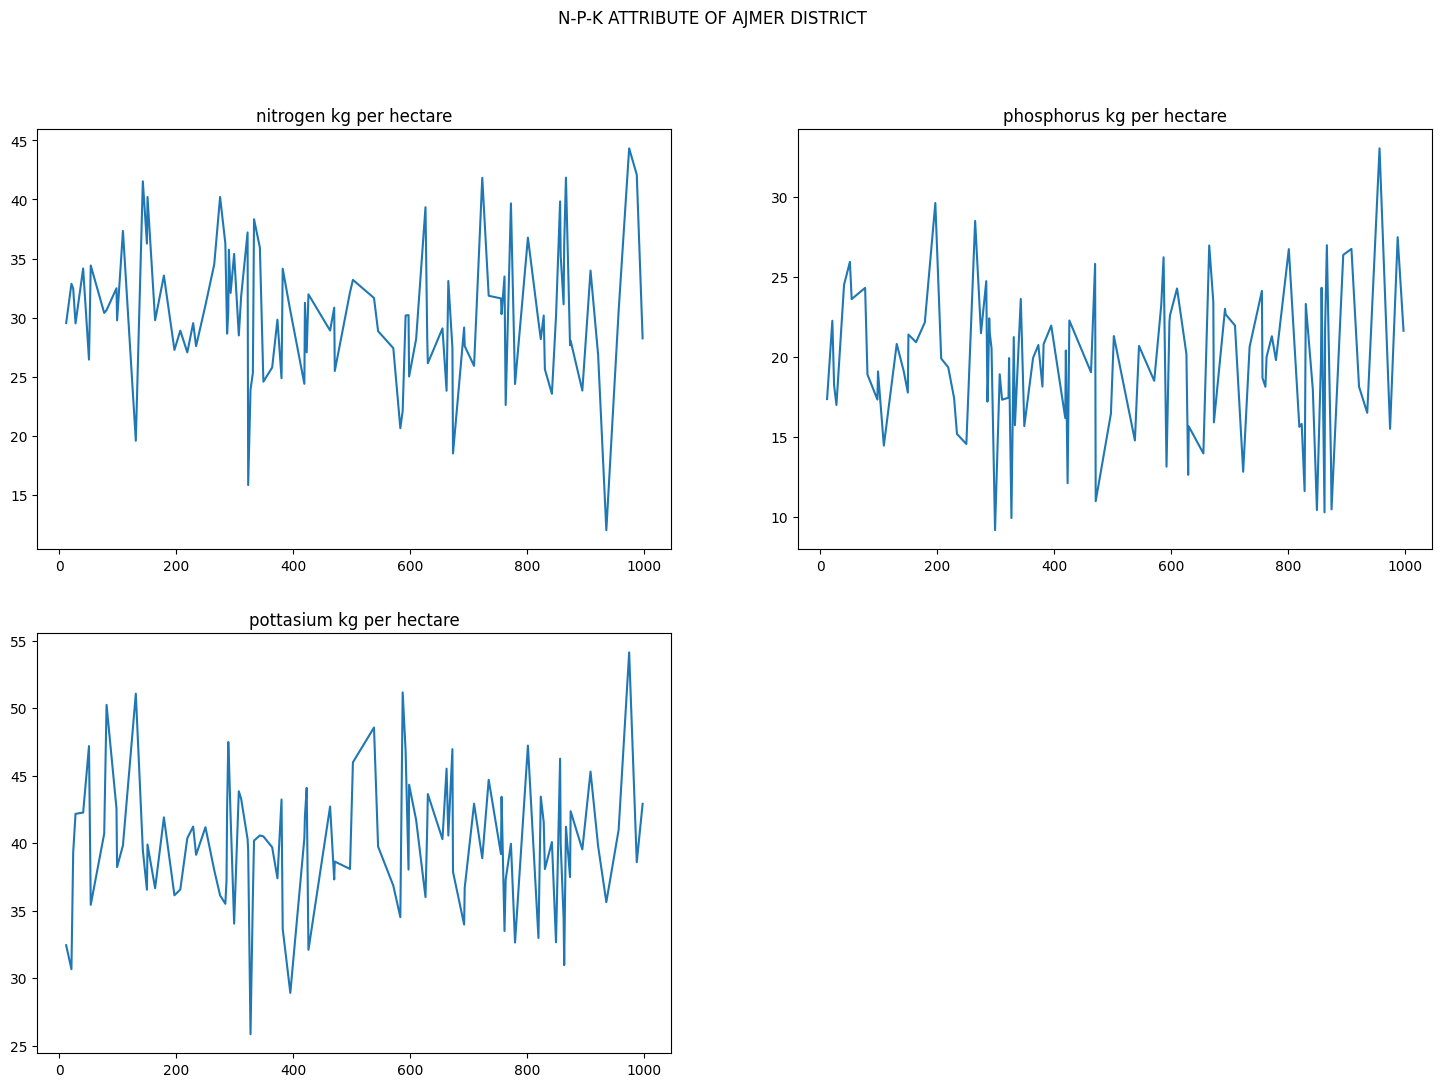

In [72]:
plt.figure(figsize=(18,12))
plt.suptitle('N-P-K ATTRIBUTE OF AJMER DISTRICT')
plt.subplot(2,2,1)
plt.plot(df_Ajmer['Nitrogen Content (kg/ha)'])
plt.title('nitrogen kg per hectare')
plt.subplot(2,2,2)
plt.plot(df_Ajmer['Phosphorus Content (kg/ha)'])
plt.title('phosphorus kg per hectare')
plt.subplot(2,2,3)
plt.plot(df_Ajmer['Potassium Content (kg/ha)'])
plt.title('pottasium kg per hectare')

as per the observation ajmer lands are rich in phosphorous but poor in nitrogen and pottasium

<h1><b>Analysis of alwar</h1>

In [74]:
df_Alwar

District        Soil Type  pH Level  Organic Matter (%)  \
7      Alwar             Clay  7.723436            1.828725   
13     Alwar  Black lava soil  7.660797            2.877467   
29     Alwar           Saline  7.735022            1.646187   
32     Alwar             Clay  7.196748            2.227952   
53     Alwar  Black lava soil  8.470609            1.560838   
..       ...              ...       ...                 ...   
951    Alwar           Saline  7.562774            1.521971   
963    Alwar  Black lava soil  7.575704            1.710524   
968    Alwar      Nitrogenous  7.468553            1.776061   
969    Alwar  Black lava soil  8.232605            1.554228   
972    Alwar           Saline  8.527097            2.073910   

     Nitrogen Content (kg/ha)  Phosphorus Content (kg/ha)  \
7                   30.852319                   15.186337   
13                  30.092008                   21.126321   
29                  26.439131                   19.446673   
32                  27.704548                   16.526998   
53                  28.109961                   21.157230   
..                        ...                         ...   
951                 41.588184                   12.963533   
963                 25.518162                   17.756522   
968                 33.290715                   18.023582   
969                 30.348521                   16.746717   
972                 22.918656                   16.786118   

     Potassium Content (kg/ha)  
7                    38.966944  
13                   43.463614  
29                   35.516789  
32                   34.228187  
53                   43.232448  
..                         ...  
951                  33.509480  
963                  41.171296  
968                  47.964820  
969                  38.366762  
972                  37.705616  

[98 rows x 7 columns]

<Axes: >

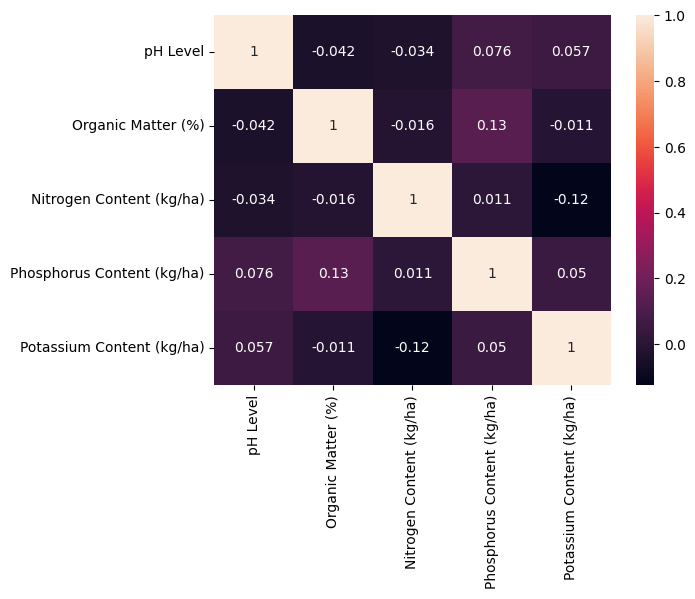

In [85]:
sns.heatmap(df_Alwar.corr(numeric_only=True),annot=True)

the nitrogen and organic matter and ph level are negatively correlated
pottasium content with organic matter is also negatively correlated

In [78]:
df_Alwar['Soil Type'].value_counts()

Soil Type
Black lava soil        18
Saline                 15
Nitrogenous            14
Clay                   13
Sandy                  11
Loamy                  10
Alkaline                9
Chalky (Calcareous)     8
Name: count, dtype: int64

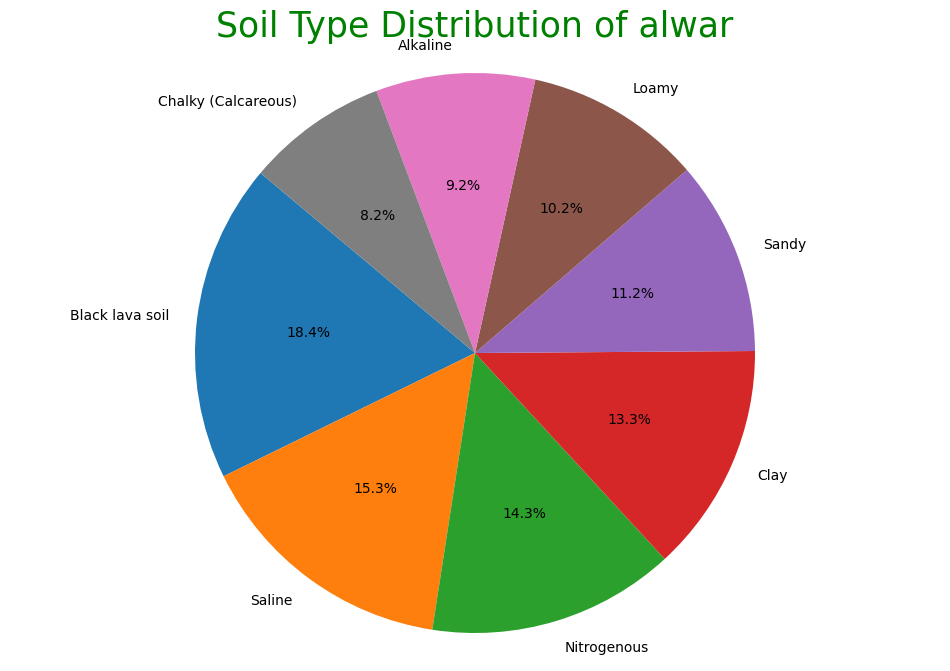

In [79]:
value_counts = df_Alwar['Soil Type'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100
# Create the pie plot
plt.figure(figsize=(12, 8))
plt.pie(percentages, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
# Add a title
plt.title('Soil Type Distribution of alwar',fontsize=25,c='g')
# Show the plot
plt.show()

black lava soil is the most predominent soil in alwar district with 18.4

<Axes: xlabel='pH Level', ylabel='Count'>

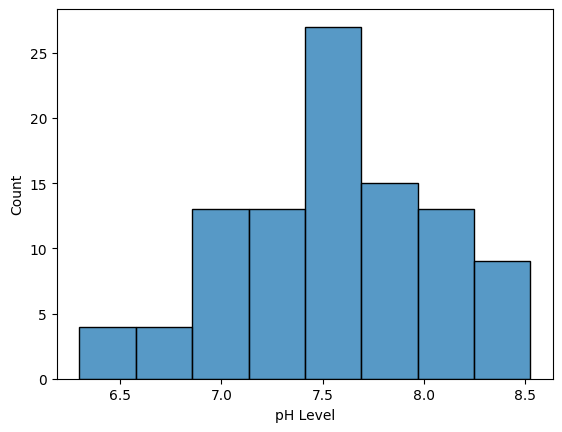

In [81]:
sns.histplot(df_Alwar['pH Level'])

the soil in alwar is mostly alkaline in nature with ph in range 7.0-8.0 ,with mode od the ph levels being 7.5

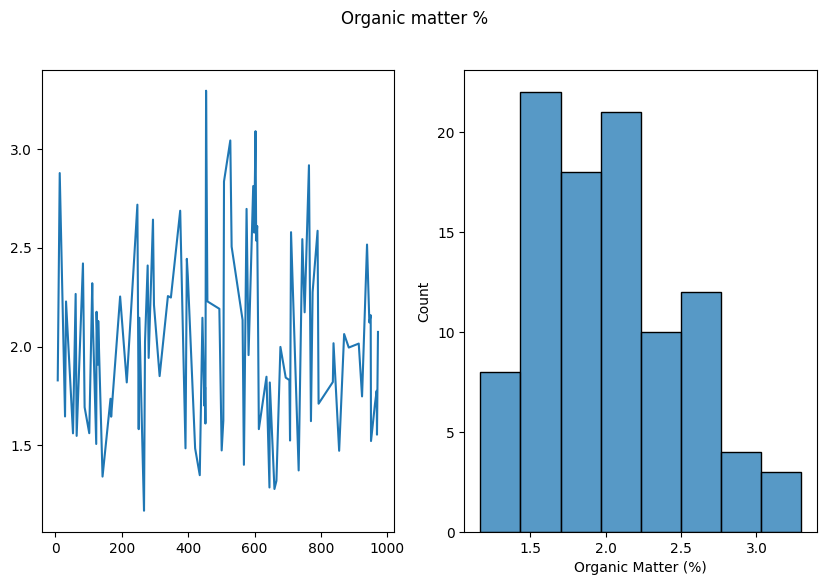

In [83]:
plt.figure(figsize=(10,6))
plt.suptitle('Organic matter % ')
plt.subplot(1,2,1)
plt.plot(df_Alwar['Organic Matter (%)'])
plt.subplot(1,2,2)
sns.histplot(df_Alwar['Organic Matter (%)'])
plt.show()

the soil of alwar district contains 1.5-2.5% of organic matter which classifies as loam soil ,which is often described as ideal soil type for agriculture

Text(0.5, 1.0, 'pottasium kg per hectare')

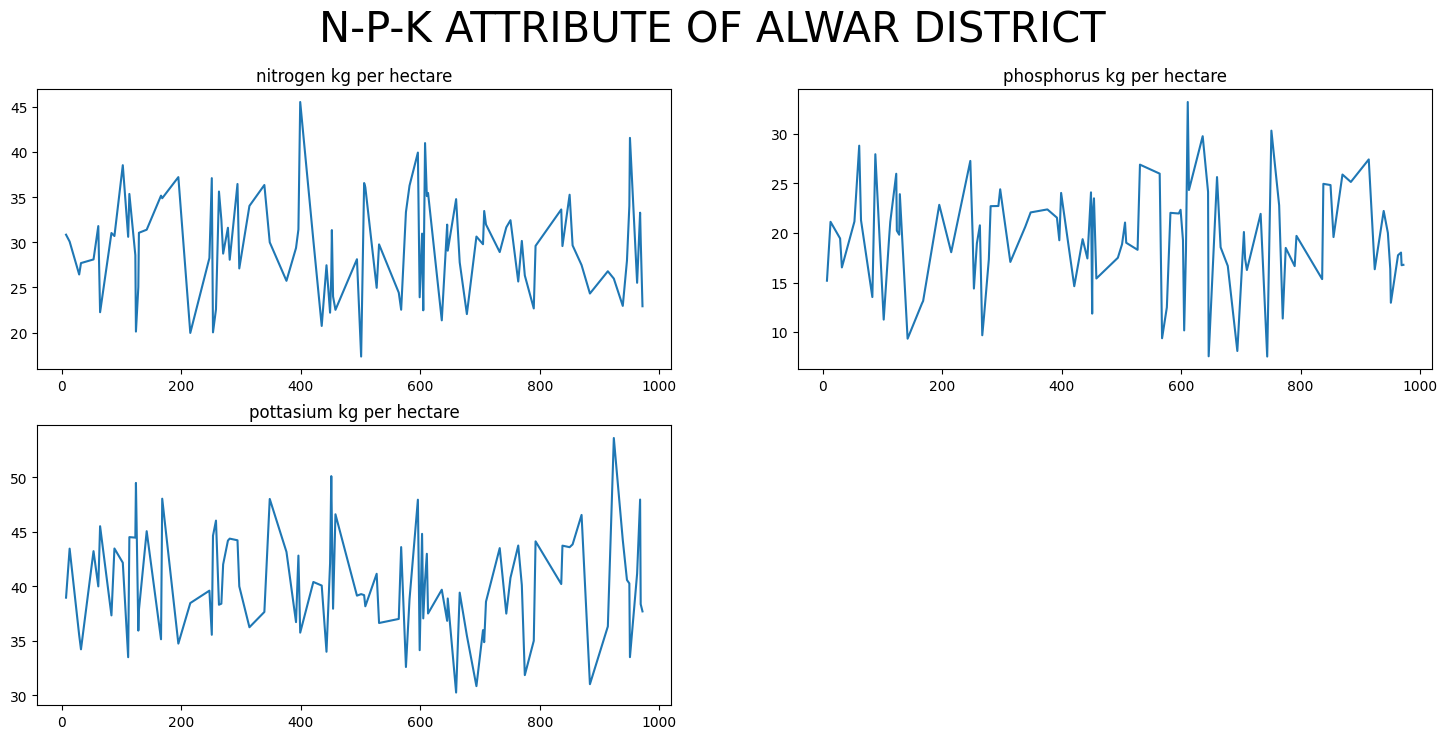

In [84]:
plt.figure(figsize=(18,8))
plt.suptitle('N-P-K ATTRIBUTE OF ALWAR DISTRICT',fontsize=30)
plt.subplot(2,2,1)
plt.plot(df_Alwar['Nitrogen Content (kg/ha)'])
plt.title('nitrogen kg per hectare')
plt.subplot(2,2,2)
plt.plot(df_Alwar['Phosphorus Content (kg/ha)'])
plt.title('phosphorus kg per hectare')
plt.subplot(2,2,3)
plt.plot(df_Alwar['Potassium Content (kg/ha)'])
plt.title('pottasium kg per hectare')

<ol>
    <li>the soils of alwar district are rich in phosphorus</li>
    <li>has good levels of pottasium</li>
    <li>but poor in the levels of nitrogen content</li>
</ol>

<h1><b>Analysis on bhilwara district</h1>

In [88]:
df_Bhilwara

District            Soil Type  pH Level  Organic Matter (%)  \
1    Bhilwara          Nitrogenous  6.832259            2.243018   
8    Bhilwara          Nitrogenous  7.805108            2.078486   
17   Bhilwara      Black lava soil  7.654999            1.971706   
22   Bhilwara          Nitrogenous  6.919108            1.858431   
31   Bhilwara               Saline  6.684362            1.381287   
..        ...                  ...       ...                 ...   
900  Bhilwara                 Clay  8.362847            2.060922   
934  Bhilwara                Sandy  7.874873            0.992549   
967  Bhilwara                Loamy  7.087675            2.351746   
970  Bhilwara                Sandy  8.501214            1.846214   
992  Bhilwara  Chalky (Calcareous)  7.184771            2.818541   

     Nitrogen Content (kg/ha)  Phosphorus Content (kg/ha)  \
1                   22.263480                   25.413455   
8                   27.067344                   21.121082   
17                  36.094854                   10.244491   
22                  28.495701                   13.952615   
31                  30.547042                   26.643204   
..                        ...                         ...   
900                 33.767087                   20.499132   
934                 31.671635                   18.550093   
967                 29.610893                   18.620243   
970                 31.801130                   22.706606   
992                 26.099281                   23.676347   

     Potassium Content (kg/ha)  
1                    37.644377  
8                    43.573049  
17                   40.717940  
22                   41.944894  
31                   41.565922  
..                         ...  
900                  36.663333  
934                  35.807497  
967                  38.191381  
970                  34.996853  
992                  37.204181  

[85 rows x 7 columns]

<Axes: >

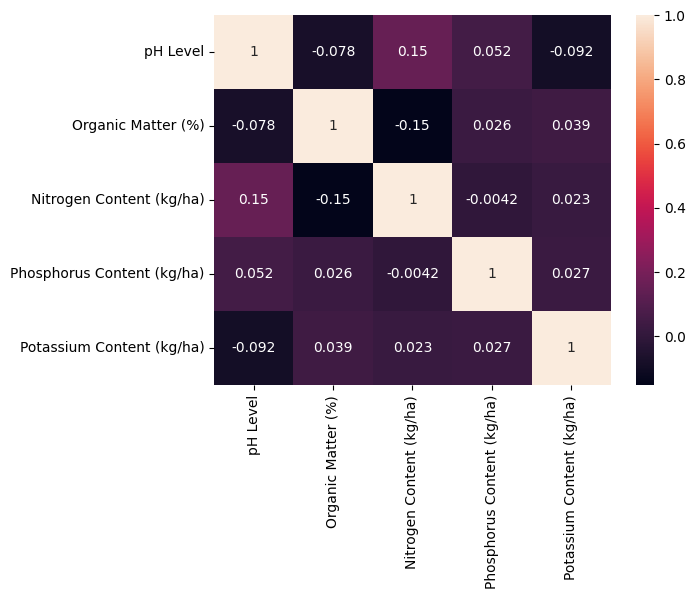

In [89]:
sns.heatmap(df_Bhilwara.corr(numeric_only=True),annot=True)

In [90]:
df_Bhilwara['Soil Type'].value_counts()

Soil Type
Alkaline               17
Nitrogenous            14
Saline                 12
Sandy                  10
Black lava soil         9
Loamy                   8
Clay                    8
Chalky (Calcareous)     7
Name: count, dtype: int64

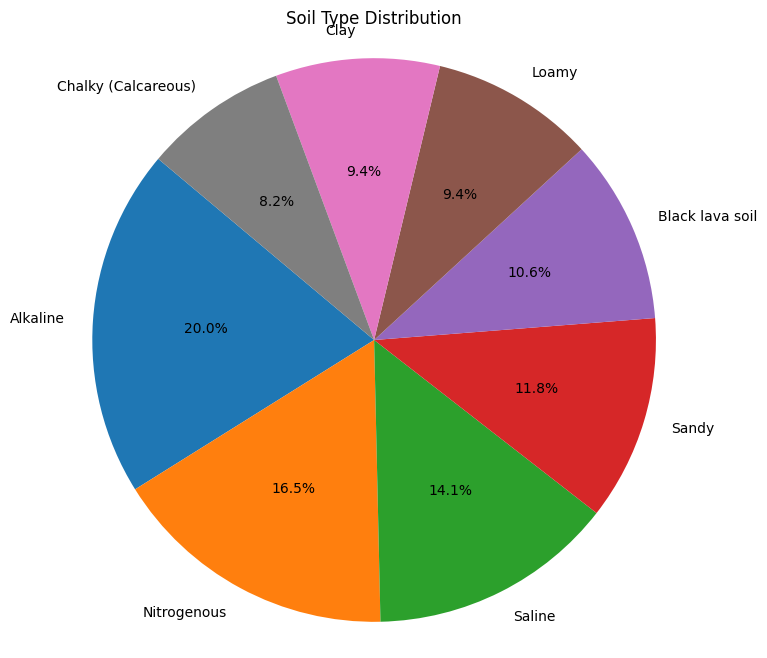

In [92]:
value_counts = df_Bhilwara['Soil Type'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100
# Create the pie plot
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
# Add a title
plt.title('Soil Type Distribution')
# Show the plot
plt.show()

The most dominant soil type in bhilwara district is alkaline , nitrogenous and saline are just behind alkaline.
the 3 making up 50% of the soil

<Axes: xlabel='pH Level', ylabel='Count'>

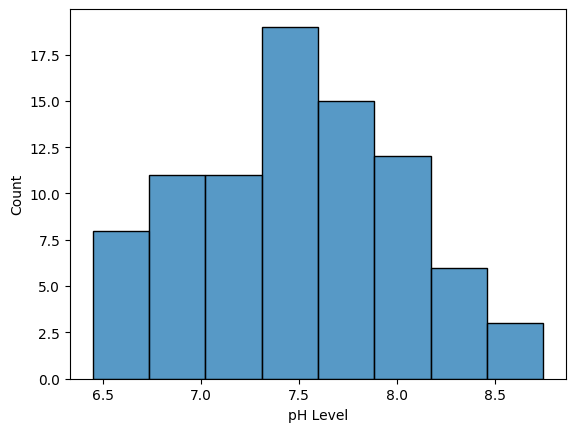

In [93]:
sns.histplot(df_Bhilwara['pH Level'])

the ph level of soil in bhilwara ranges between 7.5-8

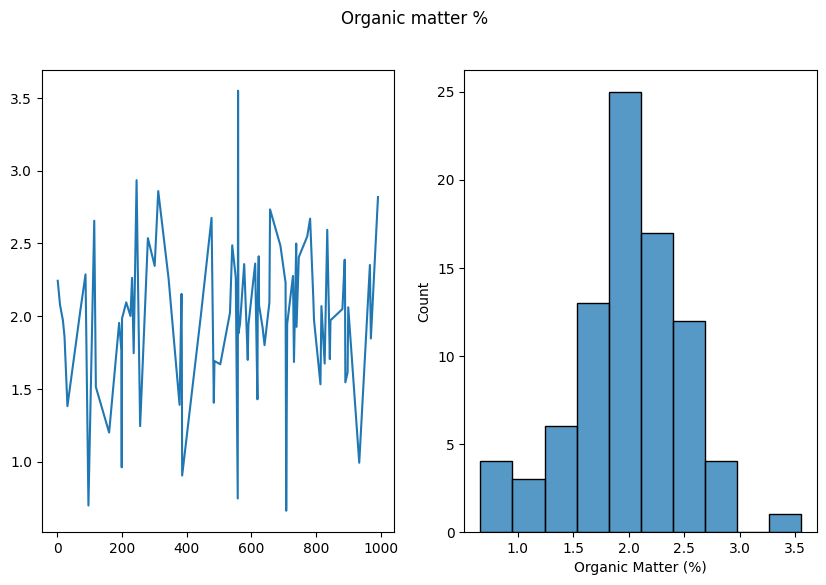

In [96]:
plt.figure(figsize=(10,6))
plt.suptitle('Organic matter % ')
plt.subplot(1,2,1)
plt.plot(df_Bhilwara['Organic Matter (%)'])
plt.subplot(1,2,2)
sns.histplot(df_Bhilwara['Organic Matter (%)'])
plt.show()

Text(0.5, 1.0, 'pottasium kg per hectare')

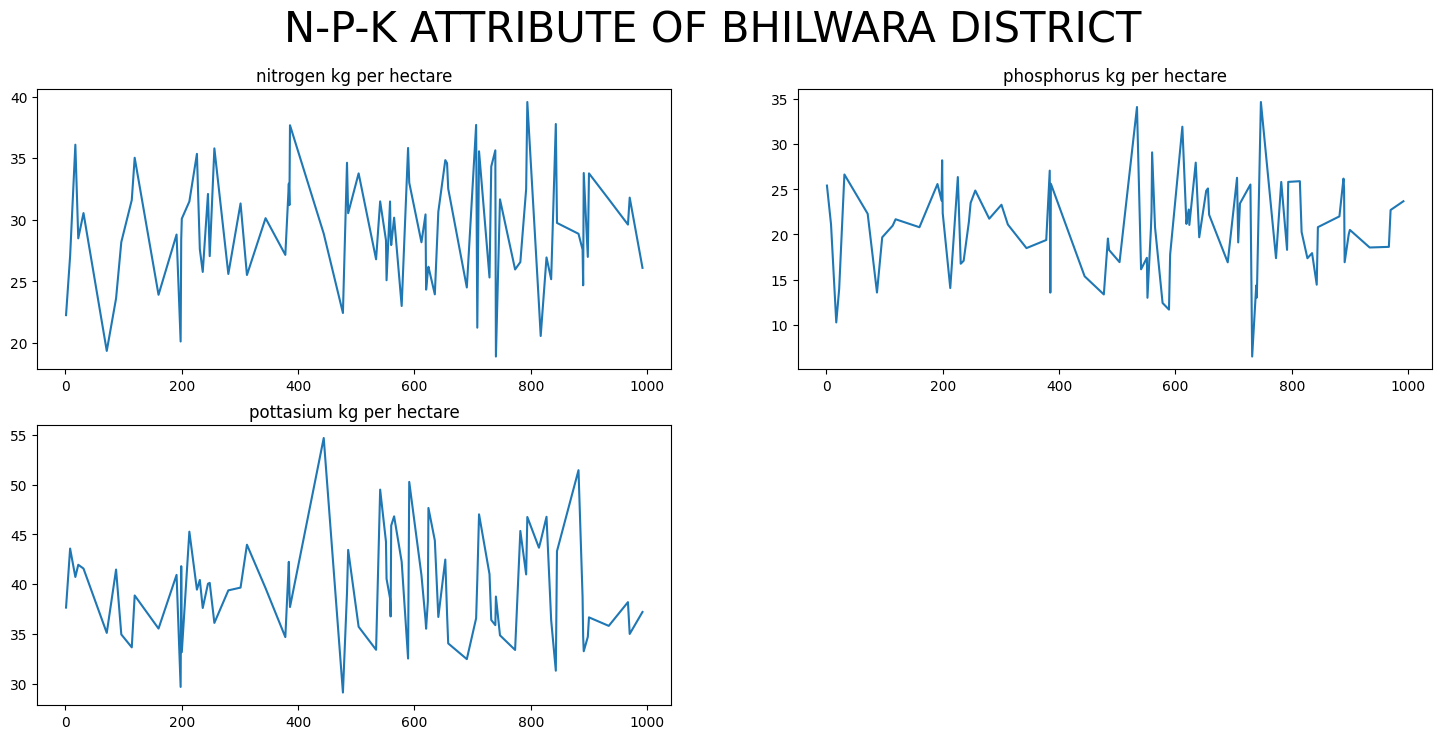

In [98]:
plt.figure(figsize=(18,8))
plt.suptitle('N-P-K ATTRIBUTE OF BHILWARA DISTRICT',fontsize=30)
plt.subplot(2,2,1)
plt.plot(df_Bhilwara['Nitrogen Content (kg/ha)'])
plt.title('nitrogen kg per hectare')
plt.subplot(2,2,2)
plt.plot(df_Bhilwara['Phosphorus Content (kg/ha)'])
plt.title('phosphorus kg per hectare')
plt.subplot(2,2,3)
plt.plot(df_Bhilwara['Potassium Content (kg/ha)'])
plt.title('pottasium kg per hectare')

<h1><b>Analysis of hanumangarh</h1>

In [99]:
df_Hanumangarh

District            Soil Type  pH Level  Organic Matter (%)  \
6    Hanumangarh                Sandy  6.255836            1.670876   
20   Hanumangarh                 Clay  7.146554            2.427778   
23   Hanumangarh      Black lava soil  7.625737            1.902865   
37   Hanumangarh          Nitrogenous  8.165287            1.401606   
40   Hanumangarh  Chalky (Calcareous)  7.592588            2.212722   
..           ...                  ...       ...                 ...   
965  Hanumangarh          Nitrogenous  8.082797            1.970584   
971  Hanumangarh                Sandy  7.072452            1.396989   
979  Hanumangarh          Nitrogenous  7.225421            2.665216   
988  Hanumangarh          Nitrogenous  6.513955            2.144014   
996  Hanumangarh               Saline  7.035537            1.747936   

     Nitrogen Content (kg/ha)  Phosphorus Content (kg/ha)  \
6                   32.267544                   15.088530   
20                  38.247404                   25.353053   
23                  26.221042                   25.243536   
37                  34.468488                   24.464769   
40                  31.111449                   26.394329   
..                        ...                         ...   
965                 28.895341                   20.955621   
971                 25.570146                    5.749849   
979                 29.397064                   13.299376   
988                 22.780372                   22.224268   
996                 29.635712                   29.446394   

     Potassium Content (kg/ha)  
6                    40.294921  
20                   36.351988  
23                   48.277036  
37                   49.148101  
40                   35.238418  
..                         ...  
965                  34.251463  
971                  42.722912  
979                  37.571606  
988                  42.057829  
996                  41.190857  

[85 rows x 7 columns]

<Axes: >

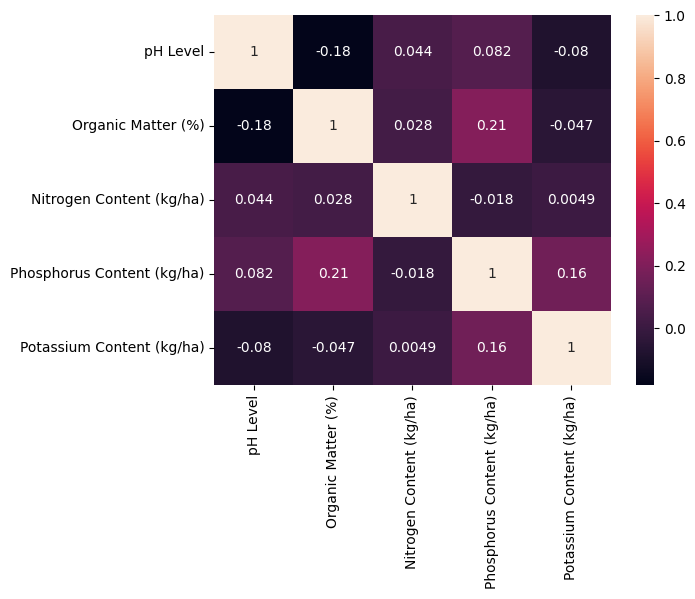

In [100]:
sns.heatmap(df_Hanumangarh.corr(numeric_only=True),annot=True)

In [101]:
df_Hanumangarh['Soil Type'].value_counts()

Soil Type
Nitrogenous            14
Alkaline               14
Clay                   12
Loamy                  12
Black lava soil        11
Chalky (Calcareous)     9
Saline                  8
Sandy                   5
Name: count, dtype: int64

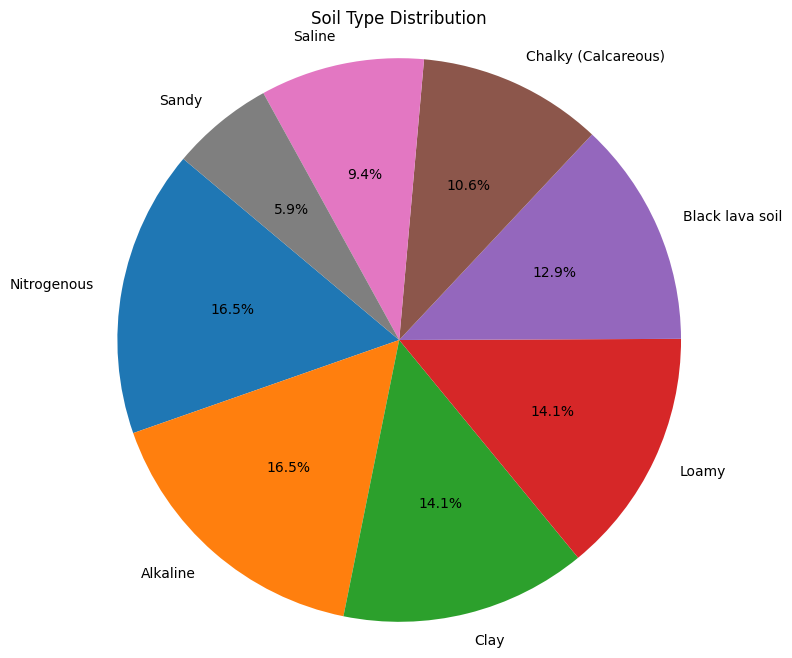

In [102]:
value_counts = df_Hanumangarh['Soil Type'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100
# Create the pie plot
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
# Add a title
plt.title('Soil Type Distribution')
# Show the plot
plt.show()

nitrogenous and alkaline are the most dominant soil types in hanumangarh district. clay is just behind them

<Axes: xlabel='pH Level', ylabel='Count'>

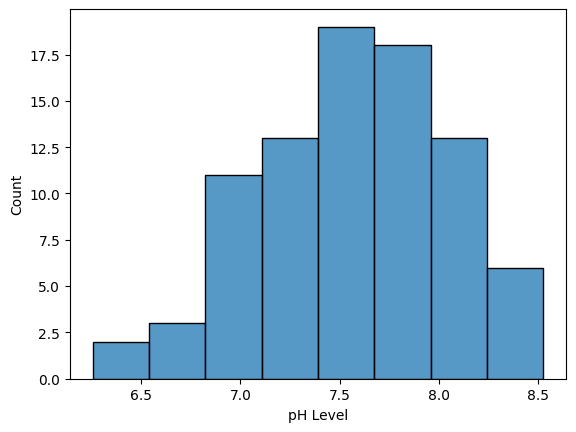

In [103]:
sns.histplot(df_Hanumangarh['pH Level'])

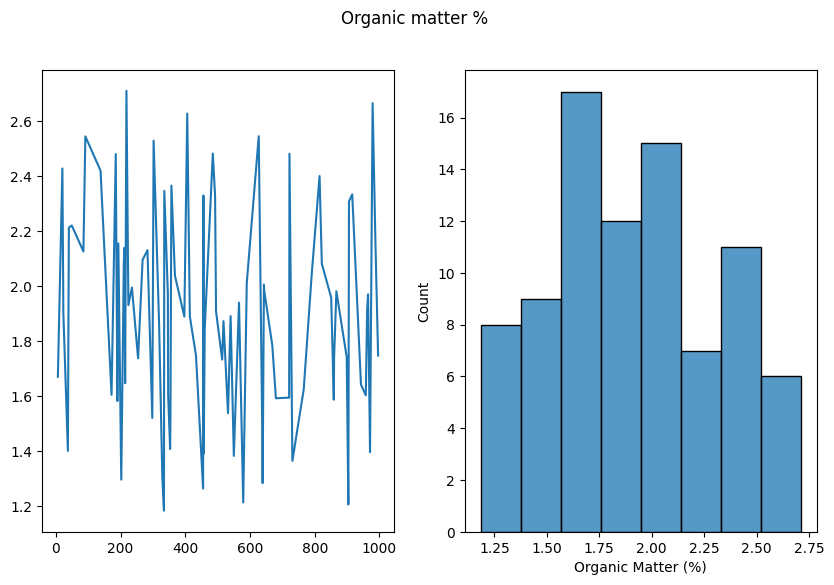

In [104]:
plt.figure(figsize=(10,6))
plt.suptitle('Organic matter % ')
plt.subplot(1,2,1)
plt.plot(df_Hanumangarh['Organic Matter (%)'])
plt.subplot(1,2,2)
sns.histplot(df_Hanumangarh['Organic Matter (%)'])
plt.show()

Text(0.5, 1.0, 'pottasium kg per hectare')

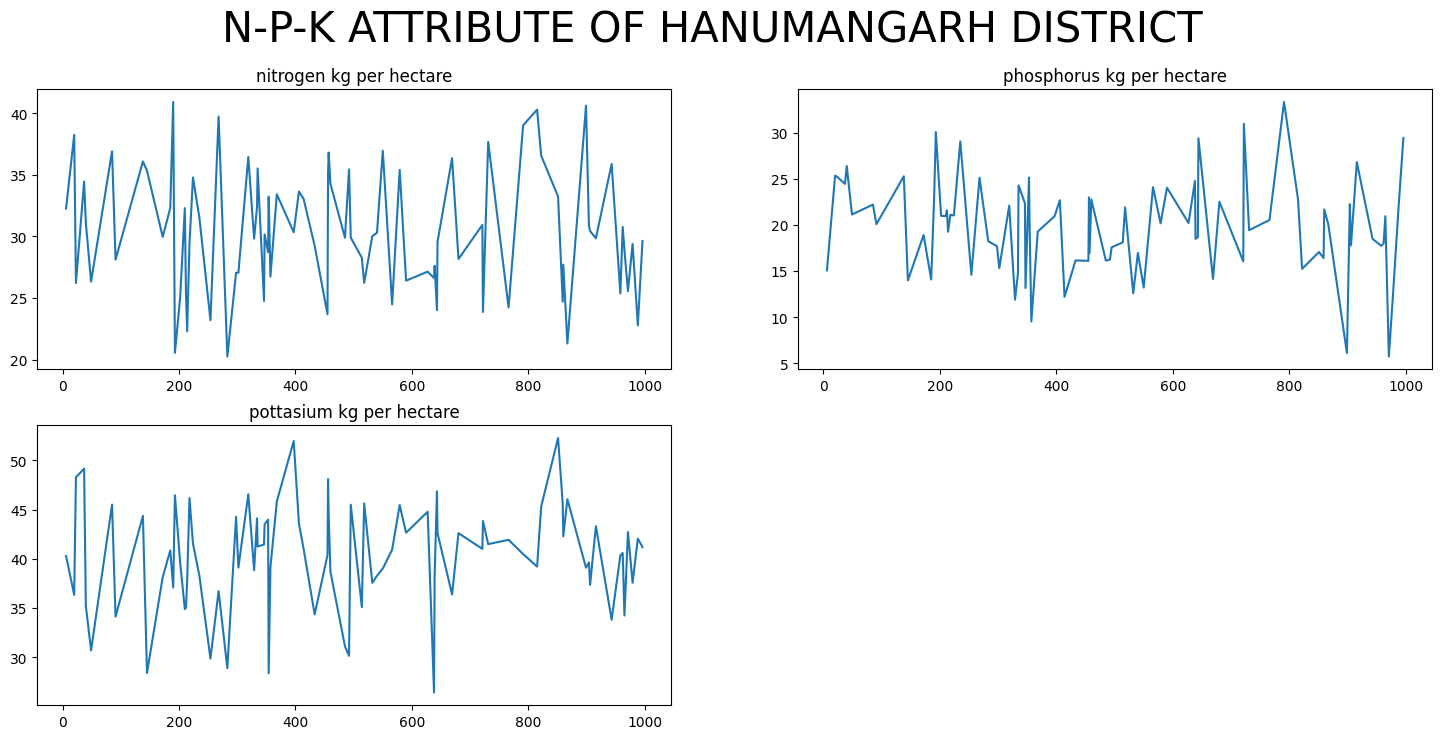

In [105]:
plt.figure(figsize=(18,8))
plt.suptitle('N-P-K ATTRIBUTE OF HANUMANGARH DISTRICT',fontsize=30)
plt.subplot(2,2,1)
plt.plot(df_Hanumangarh['Nitrogen Content (kg/ha)'])
plt.title('nitrogen kg per hectare')
plt.subplot(2,2,2)
plt.plot(df_Hanumangarh['Phosphorus Content (kg/ha)'])
plt.title('phosphorus kg per hectare')
plt.subplot(2,2,3)
plt.plot(df_Hanumangarh['Potassium Content (kg/ha)'])
plt.title('pottasium kg per hectare')

<h1><b>Analysis of jaipur</h1>

In [107]:
df_jaipur

District            Soil Type  pH Level  Organic Matter (%)  \
0     Jaipur  Chalky (Calcareous)  6.546096            1.569807   
3     Jaipur                 Clay  8.019189            1.240327   
4     Jaipur                Sandy  8.100131            1.768419   
44    Jaipur             Alkaline  6.974930            2.378748   
68    Jaipur          Nitrogenous  7.853039            1.878659   
..       ...                  ...       ...                 ...   
978   Jaipur          Nitrogenous  7.583319            2.529975   
980   Jaipur               Saline  6.756069            1.437407   
981   Jaipur                 Clay  7.464440            2.042797   
994   Jaipur             Alkaline  8.298699            2.322345   
999   Jaipur          Nitrogenous  8.604928            2.163497   

     Nitrogen Content (kg/ha)  Phosphorus Content (kg/ha)  \
0                   27.931972                   29.438438   
3                   15.839222                   17.744206   
4                   27.942867                   25.769504   
44                  36.852681                   23.476015   
68                  24.868154                   26.150003   
..                        ...                         ...   
978                 24.029067                   14.936778   
980                 31.944095                   14.130633   
981                 28.608135                   23.864239   
994                 26.726151                   17.446958   
999                 25.824377                   28.264565   

     Potassium Content (kg/ha)  
0                    42.782766  
3                    42.758704  
4                    30.651292  
44                   41.418755  
68                   35.176473  
..                         ...  
978                  30.322850  
980                  45.563172  
981                  43.915799  
994                  40.399576  
999                  50.388888  

[103 rows x 7 columns]

<Axes: >

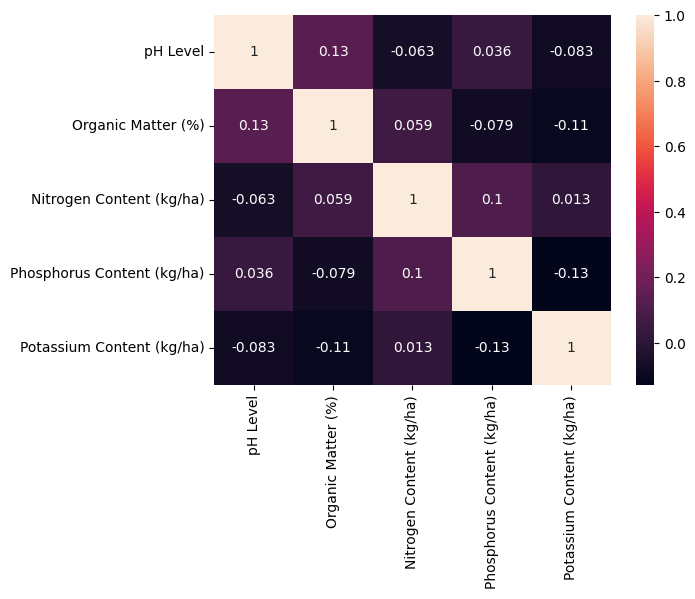

In [108]:
sns.heatmap(df_jaipur.corr(numeric_only=True),annot=True)

In [110]:
df_jaipur['Soil Type'].value_counts()

Soil Type
Loamy                  16
Clay                   14
Alkaline               14
Sandy                  13
Chalky (Calcareous)    12
Saline                 12
Nitrogenous            11
Black lava soil        11
Name: count, dtype: int64

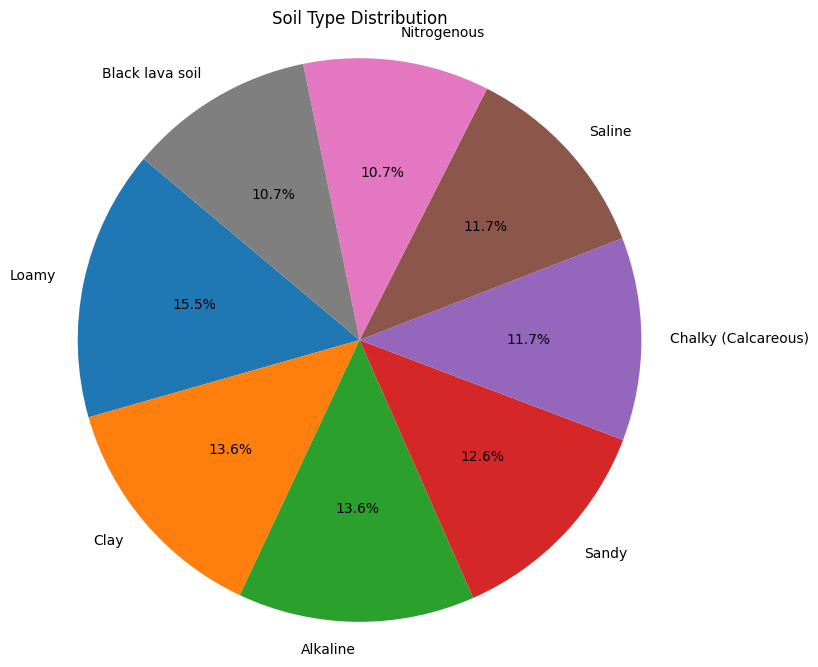

In [111]:
value_counts = df_jaipur['Soil Type'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100
# Create the pie plot
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
# Add a title
plt.title('Soil Type Distribution')
# Show the plot
plt.show()

<Axes: xlabel='pH Level', ylabel='Count'>

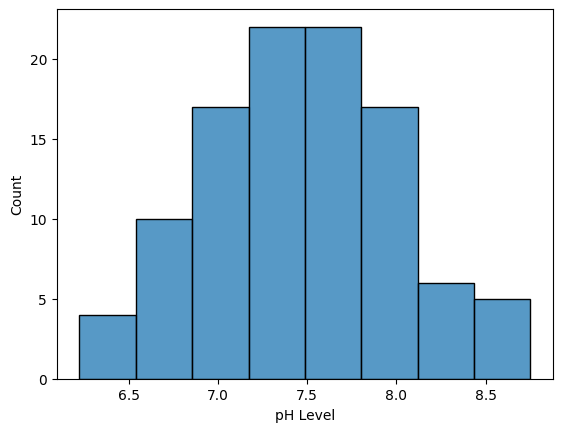

In [113]:
sns.histplot(df_jaipur['pH Level'])

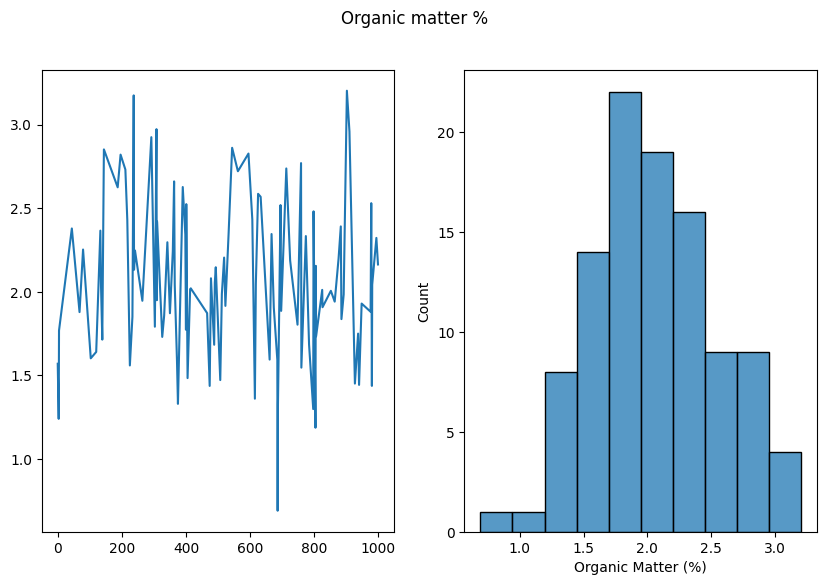

In [114]:
plt.figure(figsize=(10,6))
plt.suptitle('Organic matter % ')
plt.subplot(1,2,1)
plt.plot(df_jaipur['Organic Matter (%)'])
plt.subplot(1,2,2)
sns.histplot(df_jaipur['Organic Matter (%)'])
plt.show()

Text(0.5, 1.0, 'pottasium kg per hectare')

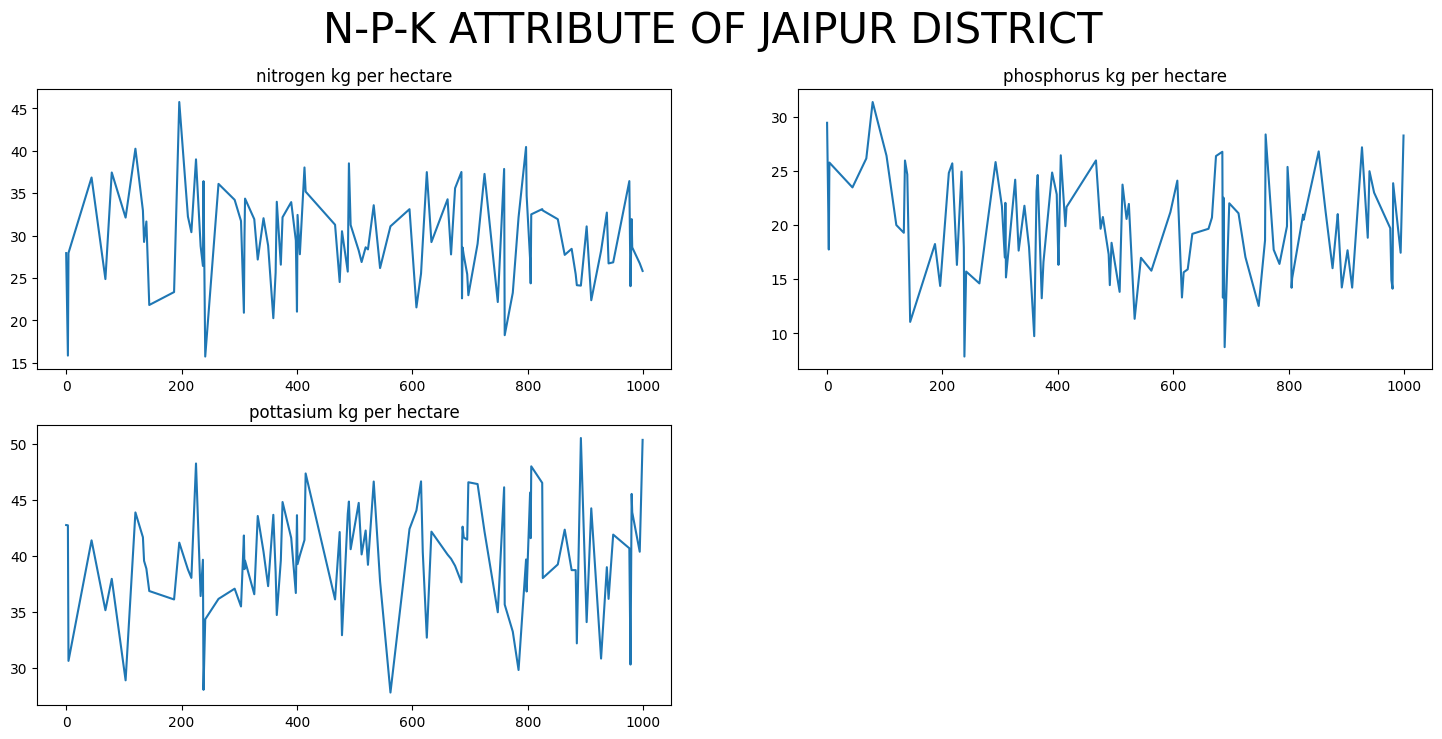

In [115]:
plt.figure(figsize=(18,8))
plt.suptitle('N-P-K ATTRIBUTE OF JAIPUR DISTRICT',fontsize=30)
plt.subplot(2,2,1)
plt.plot(df_jaipur['Nitrogen Content (kg/ha)'])
plt.title('nitrogen kg per hectare')
plt.subplot(2,2,2)
plt.plot(df_jaipur['Phosphorus Content (kg/ha)'])
plt.title('phosphorus kg per hectare')
plt.subplot(2,2,3)
plt.plot(df_jaipur['Potassium Content (kg/ha)'])
plt.title('pottasium kg per hectare')

<h1><b>Analysis on jodhpur</h1>

In [116]:
df_Jodhpur

District            Soil Type  pH Level  Organic Matter (%)  \
2    Jodhpur                Sandy  7.453182            2.662898   
5    Jodhpur  Chalky (Calcareous)  7.305740            2.095212   
16   Jodhpur                Sandy  8.100266            2.070180   
36   Jodhpur                 Clay  7.989211            2.261071   
39   Jodhpur          Nitrogenous  6.559995            2.356356   
..       ...                  ...       ...                 ...   
964  Jodhpur             Alkaline  7.799498            2.426674   
982  Jodhpur                Loamy  7.667527            2.282395   
986  Jodhpur                Sandy  7.804134            2.672968   
993  Jodhpur               Saline  7.269847            2.515125   
998  Jodhpur          Nitrogenous  8.104615            1.987857   

     Nitrogen Content (kg/ha)  Phosphorus Content (kg/ha)  \
2                   23.564182                   13.014409   
5                   32.246094                   17.450967   
16                  20.164651                   14.414068   
36                  24.481651                   18.346054   
39                  20.584249                   18.138405   
..                        ...                         ...   
964                 27.529050                   21.419223   
982                 28.939552                   22.711015   
986                 29.126760                   26.800841   
993                 28.099816                   17.976023   
998                 38.194803                   24.540113   

     Potassium Content (kg/ha)  
2                    37.082003  
5                    40.172205  
16                   39.070771  
36                   36.099004  
39                   42.186566  
..                         ...  
964                  44.812513  
982                  38.310611  
986                  39.051533  
993                  45.664023  
998                  36.462802  

[128 rows x 7 columns]

<Axes: >

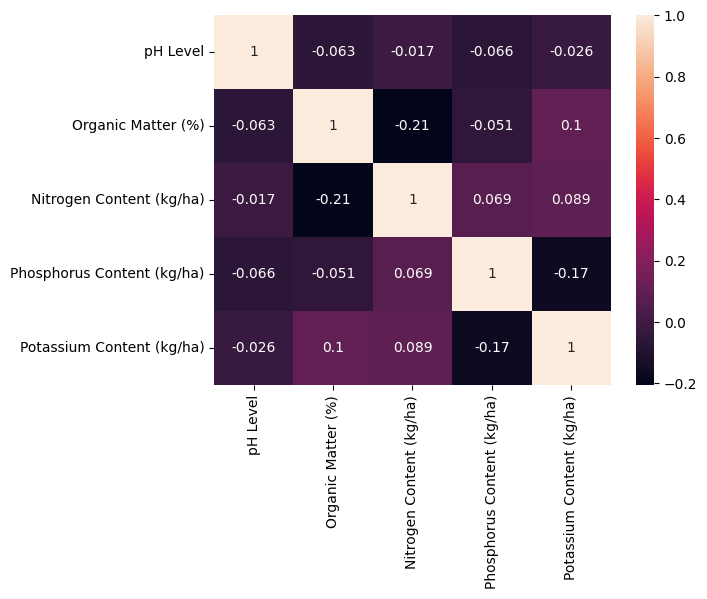

In [117]:
sns.heatmap(df_Jodhpur.corr(numeric_only=True),annot=True)

In [118]:
df_Jodhpur['Soil Type'].value_counts()

Soil Type
Clay                   21
Alkaline               19
Loamy                  19
Saline                 18
Sandy                  14
Chalky (Calcareous)    14
Nitrogenous            12
Black lava soil        11
Name: count, dtype: int64

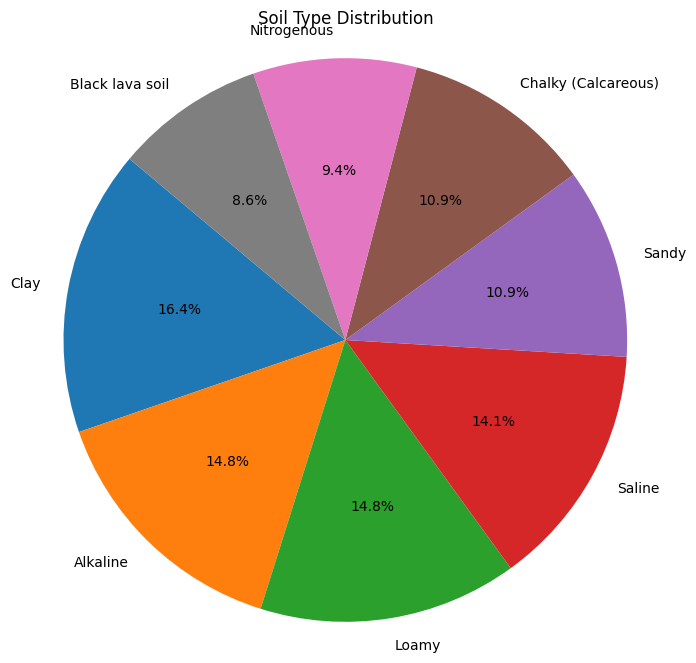

In [119]:
value_counts = df_Jodhpur['Soil Type'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100
# Create the pie plot
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
# Add a title
plt.title('Soil Type Distribution')
# Show the plot
plt.show()

<Axes: xlabel='pH Level', ylabel='Count'>

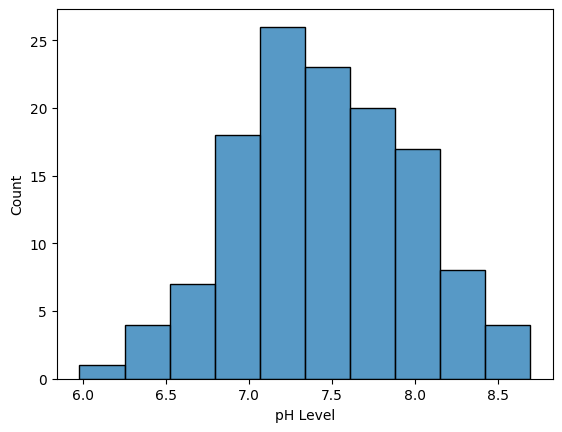

In [120]:
sns.histplot(df_Jodhpur['pH Level'])

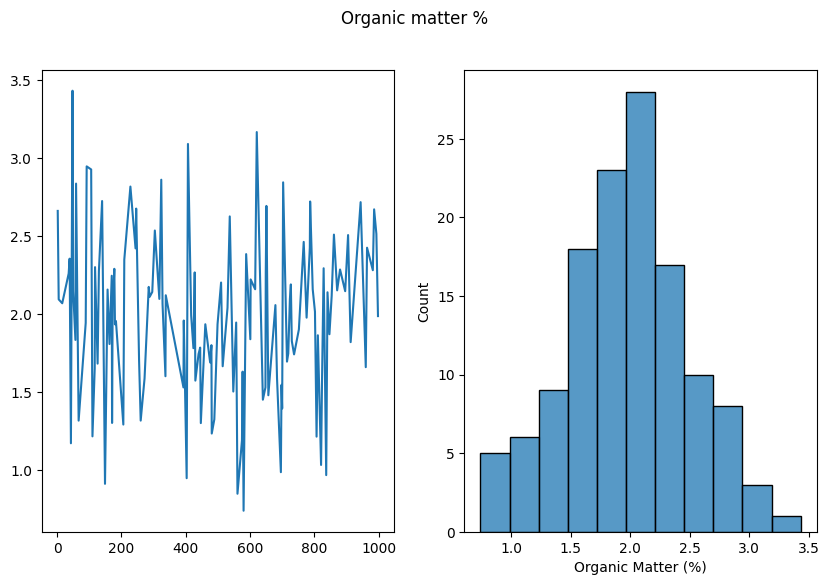

In [121]:
plt.figure(figsize=(10,6))
plt.suptitle('Organic matter % ')
plt.subplot(1,2,1)
plt.plot(df_Jodhpur['Organic Matter (%)'])
plt.subplot(1,2,2)
sns.histplot(df_Jodhpur['Organic Matter (%)'])
plt.show()

Text(0.5, 1.0, 'pottasium kg per hectare')

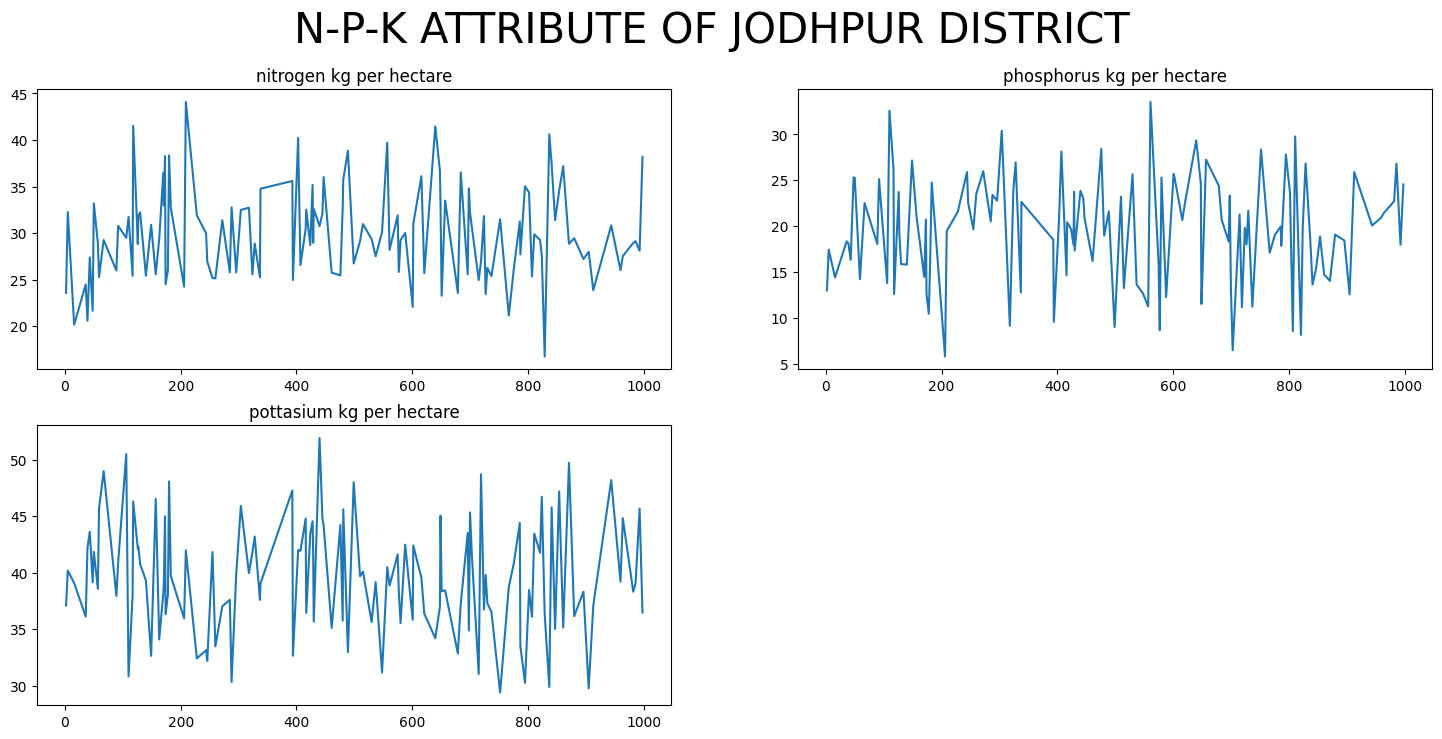

In [122]:
plt.figure(figsize=(18,8))
plt.suptitle('N-P-K ATTRIBUTE OF JODHPUR DISTRICT',fontsize=30)
plt.subplot(2,2,1)
plt.plot(df_Jodhpur['Nitrogen Content (kg/ha)'])
plt.title('nitrogen kg per hectare')
plt.subplot(2,2,2)
plt.plot(df_Jodhpur['Phosphorus Content (kg/ha)'])
plt.title('phosphorus kg per hectare')
plt.subplot(2,2,3)
plt.plot(df_Jodhpur['Potassium Content (kg/ha)'])
plt.title('pottasium kg per hectare')

<h1><b>Analysis on kota district</h1>

In [124]:
df_Kota

District            Soil Type  pH Level  Organic Matter (%)  \
18      Kota                Sandy  6.591010            2.379856   
34      Kota                Sandy  7.027127            2.304123   
35      Kota          Nitrogenous  7.123782            1.266607   
38      Kota          Nitrogenous  7.295157            2.356161   
42      Kota               Saline  8.091747            1.410980   
..       ...                  ...       ...                 ...   
973     Kota                 Clay  6.991208            2.430091   
975     Kota                 Clay  7.322897            1.703767   
977     Kota      Black lava soil  7.737629            2.585331   
989     Kota  Chalky (Calcareous)  7.029298            2.560484   
990     Kota                 Clay  6.792238            2.488936   

     Nitrogen Content (kg/ha)  Phosphorus Content (kg/ha)  \
18                  29.527706                   22.098050   
34                  23.414340                   23.880140   
35                  27.492989                   24.876562   
38                  41.408259                   16.911792   
42                  38.336121                   27.616193   
..                        ...                         ...   
973                 34.051300                   14.222741   
975                 31.635362                   17.089693   
977                 21.723876                   22.922620   
989                 34.027874                   24.879117   
990                 28.648143                   13.051099   

     Potassium Content (kg/ha)  
18                   35.680585  
34                   34.988915  
35                   42.578140  
38                   32.324799  
42                   43.678110  
..                         ...  
973                  43.625405  
975                  41.995221  
977                  38.659304  
989                  40.044289  
990                  46.760197  

[114 rows x 7 columns]

<Axes: >

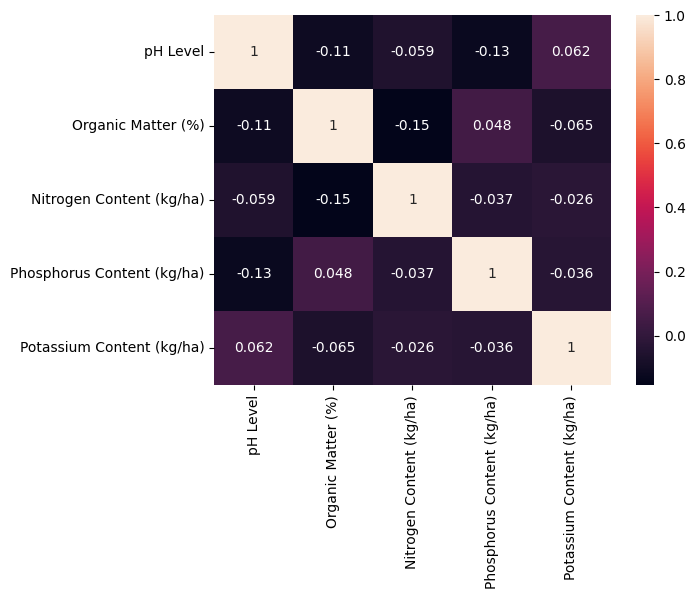

In [125]:
sns.heatmap(df_Kota.corr(numeric_only=True),annot=True)

In [126]:
df_Kota['Soil Type'].value_counts()

Soil Type
Clay                   20
Chalky (Calcareous)    19
Black lava soil        18
Saline                 16
Nitrogenous            13
Loamy                  10
Sandy                   9
Alkaline                9
Name: count, dtype: int64

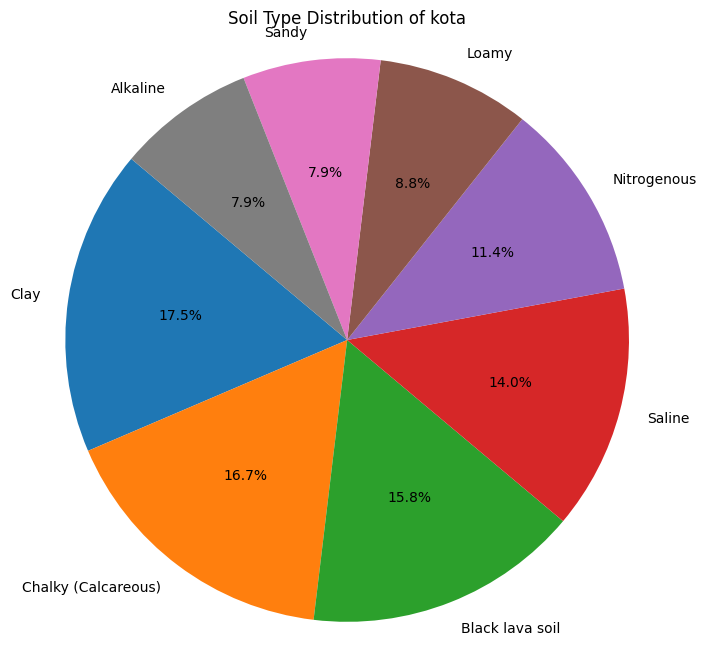

In [128]:
value_counts = df_Kota['Soil Type'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100
# Create the pie plot
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
# Add a title
plt.title('Soil Type Distribution of kota')
# Show the plot
plt.show()

<Axes: xlabel='pH Level', ylabel='Count'>

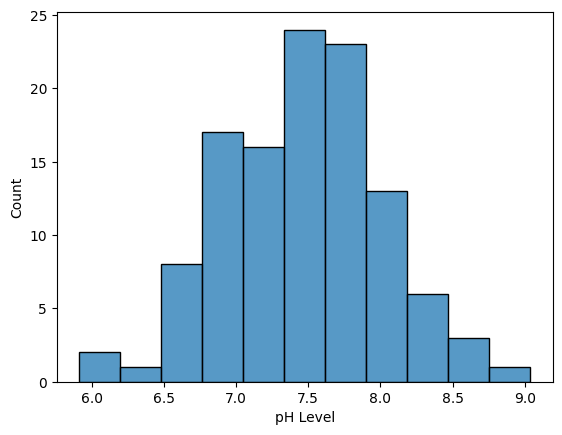

In [130]:
sns.histplot(df_Kota['pH Level'])

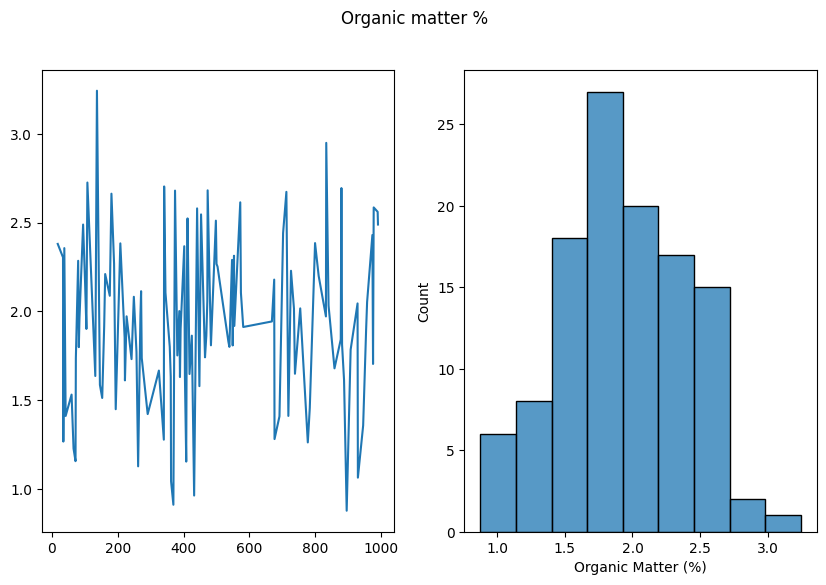

In [131]:
plt.figure(figsize=(10,6))
plt.suptitle('Organic matter % ')
plt.subplot(1,2,1)
plt.plot(df_Kota['Organic Matter (%)'])
plt.subplot(1,2,2)
sns.histplot(df_Kota['Organic Matter (%)'])
plt.show()

Text(0.5, 1.0, 'pottasium kg per hectare')

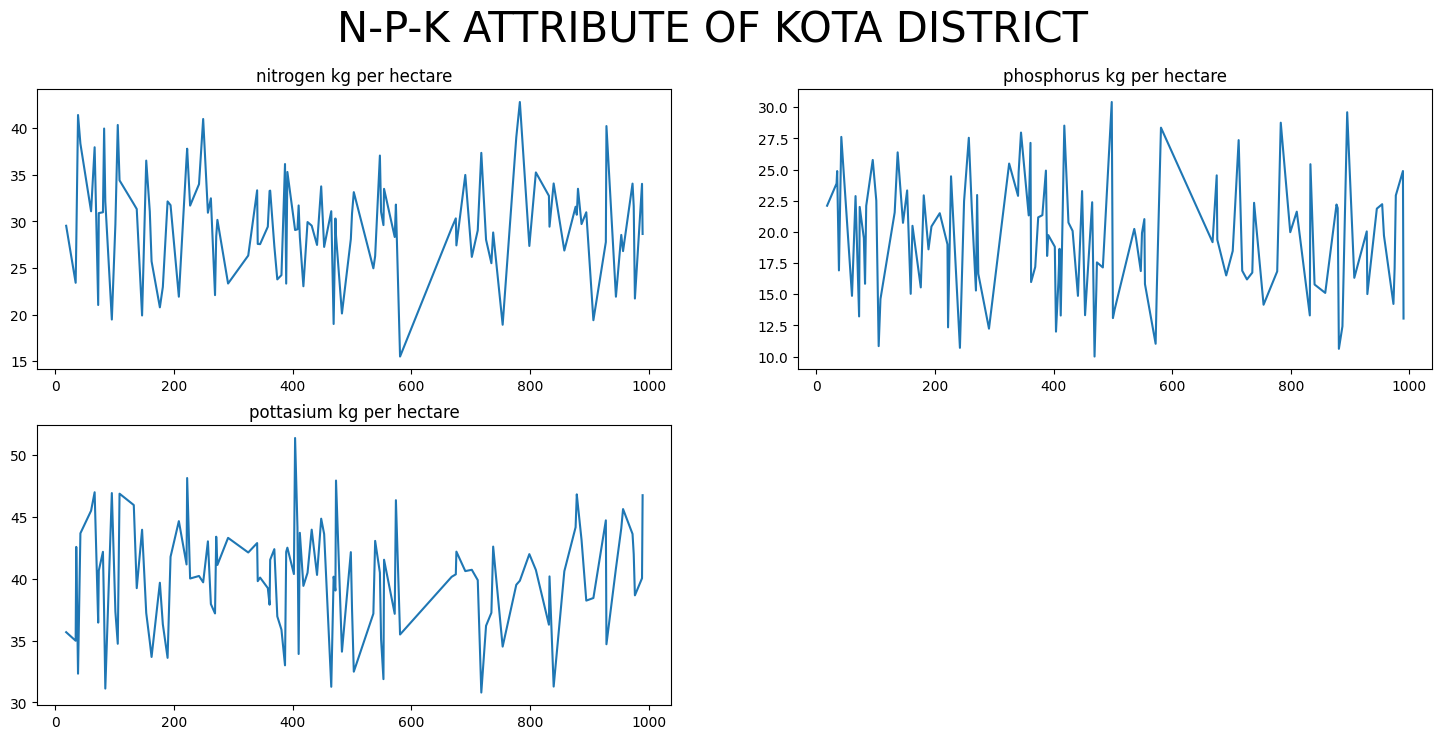

In [132]:
plt.figure(figsize=(18,8))
plt.suptitle('N-P-K ATTRIBUTE OF KOTA DISTRICT',fontsize=30)
plt.subplot(2,2,1)
plt.plot(df_Kota['Nitrogen Content (kg/ha)'])
plt.title('nitrogen kg per hectare')
plt.subplot(2,2,2)
plt.plot(df_Kota['Phosphorus Content (kg/ha)'])
plt.title('phosphorus kg per hectare')
plt.subplot(2,2,3)
plt.plot(df_Kota['Potassium Content (kg/ha)'])
plt.title('pottasium kg per hectare')

<h1><b>Analysis of nagaur district</h1>

In [133]:
df_Nagaur

District            Soil Type  pH Level  Organic Matter (%)  \
14    Nagaur                Sandy  6.865335            2.851257   
19    Nagaur               Saline  8.139732            2.520862   
33    Nagaur  Chalky (Calcareous)  6.624086            1.805038   
63    Nagaur  Chalky (Calcareous)  7.708223            1.973048   
74    Nagaur                Loamy  7.461278            1.402353   
..       ...                  ...       ...                 ...   
936   Nagaur               Saline  7.766392            1.597237   
953   Nagaur                 Clay  7.484868            3.299411   
961   Nagaur          Nitrogenous  7.222357            2.213981   
983   Nagaur               Saline  7.501116            1.862678   
995   Nagaur               Saline  7.660465            1.506067   

     Nitrogen Content (kg/ha)  Phosphorus Content (kg/ha)  \
14                  31.011644                   28.159284   
19                  32.917722                   19.352414   
33                  30.790267                   19.516882   
63                  25.088482                   25.609289   
74                  37.254638                   29.035983   
..                        ...                         ...   
936                 28.924431                   27.711383   
953                 21.379691                   23.469117   
961                 38.615374                   28.196283   
983                 27.713907                   16.554441   
995                 33.615190                   20.427567   

     Potassium Content (kg/ha)  
14                   36.334835  
19                   42.899286  
33                   37.920165  
63                   51.600204  
74                   31.586707  
..                         ...  
936                  44.971758  
953                  45.832642  
961                  30.386141  
983                  42.338451  
995                  31.421458  

[85 rows x 7 columns]

<Axes: >

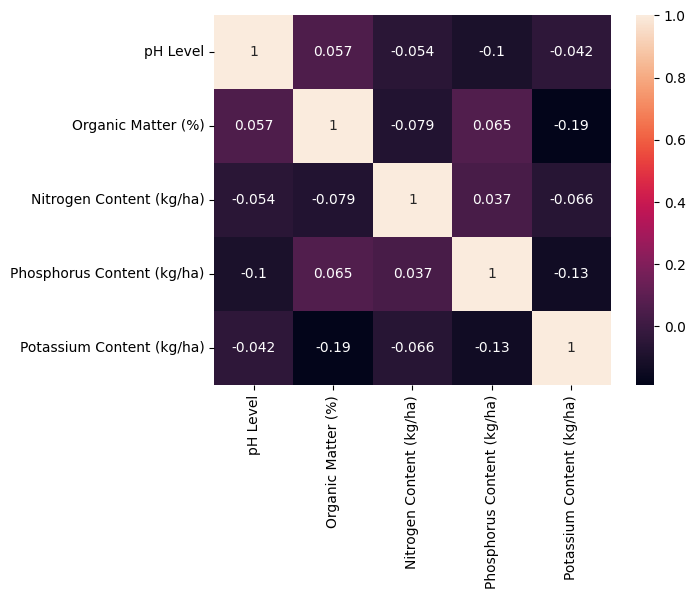

In [134]:
sns.heatmap(df_Nagaur.corr(numeric_only=True),annot=True)

In [136]:
df_Nagaur['Soil Type'].value_counts()

Soil Type
Black lava soil        19
Saline                 13
Sandy                  12
Chalky (Calcareous)    10
Loamy                   8
Alkaline                8
Nitrogenous             8
Clay                    7
Name: count, dtype: int64

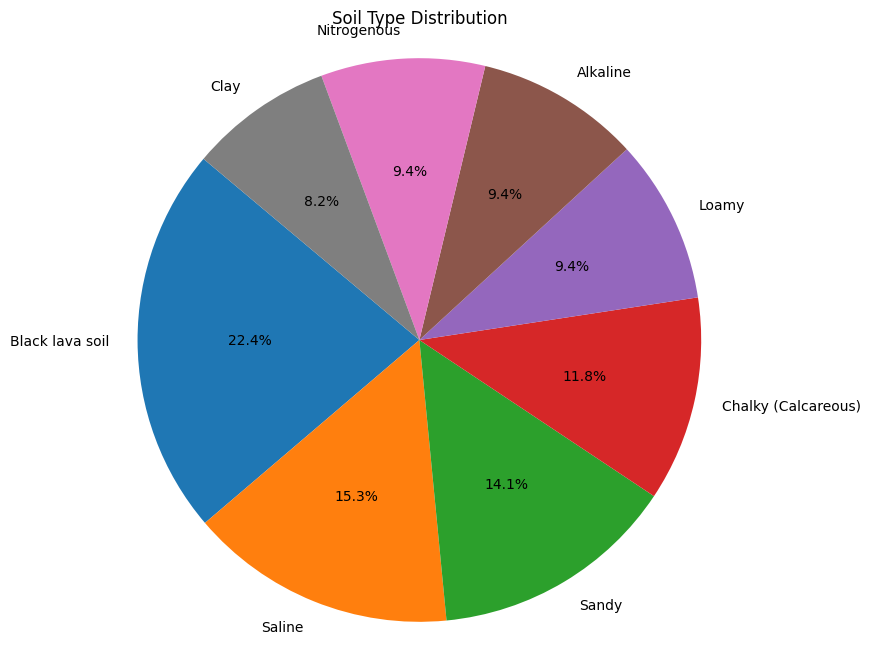

In [137]:
value_counts = df_Nagaur['Soil Type'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100
# Create the pie plot
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
# Add a title
plt.title('Soil Type Distribution')
# Show the plot
plt.show()

<Axes: xlabel='pH Level', ylabel='Count'>

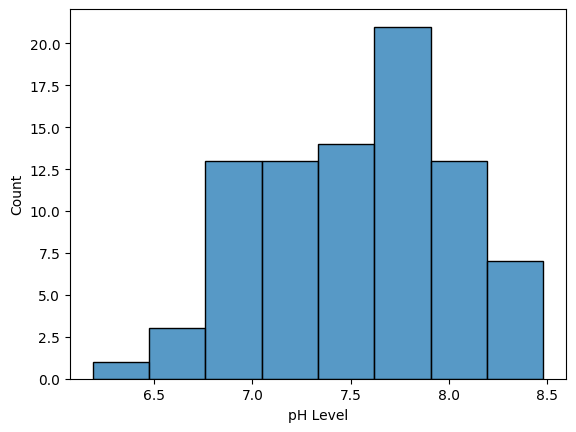

In [139]:
sns.histplot(df_Nagaur['pH Level'])

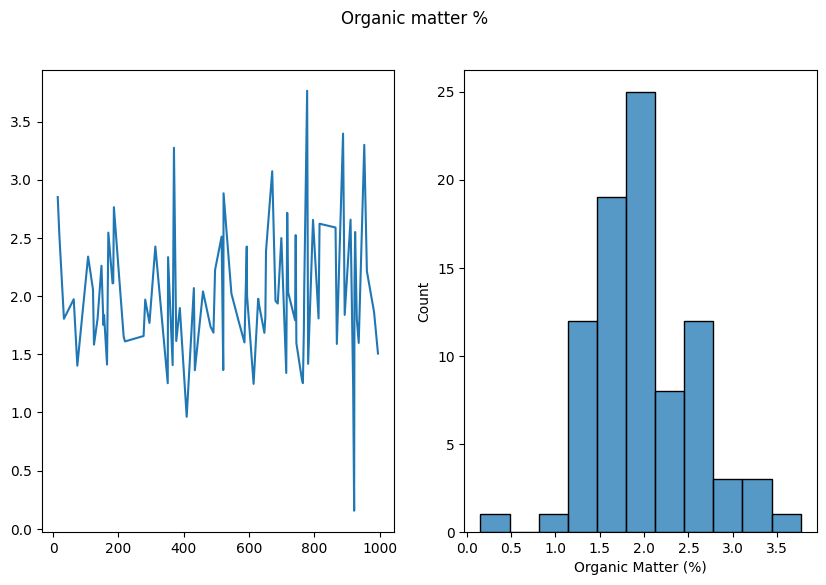

In [140]:
plt.figure(figsize=(10,6))
plt.suptitle('Organic matter % ')
plt.subplot(1,2,1)
plt.plot(df_Nagaur['Organic Matter (%)'])
plt.subplot(1,2,2)
sns.histplot(df_Nagaur['Organic Matter (%)'])
plt.show()

Text(0.5, 1.0, 'pottasium kg per hectare')

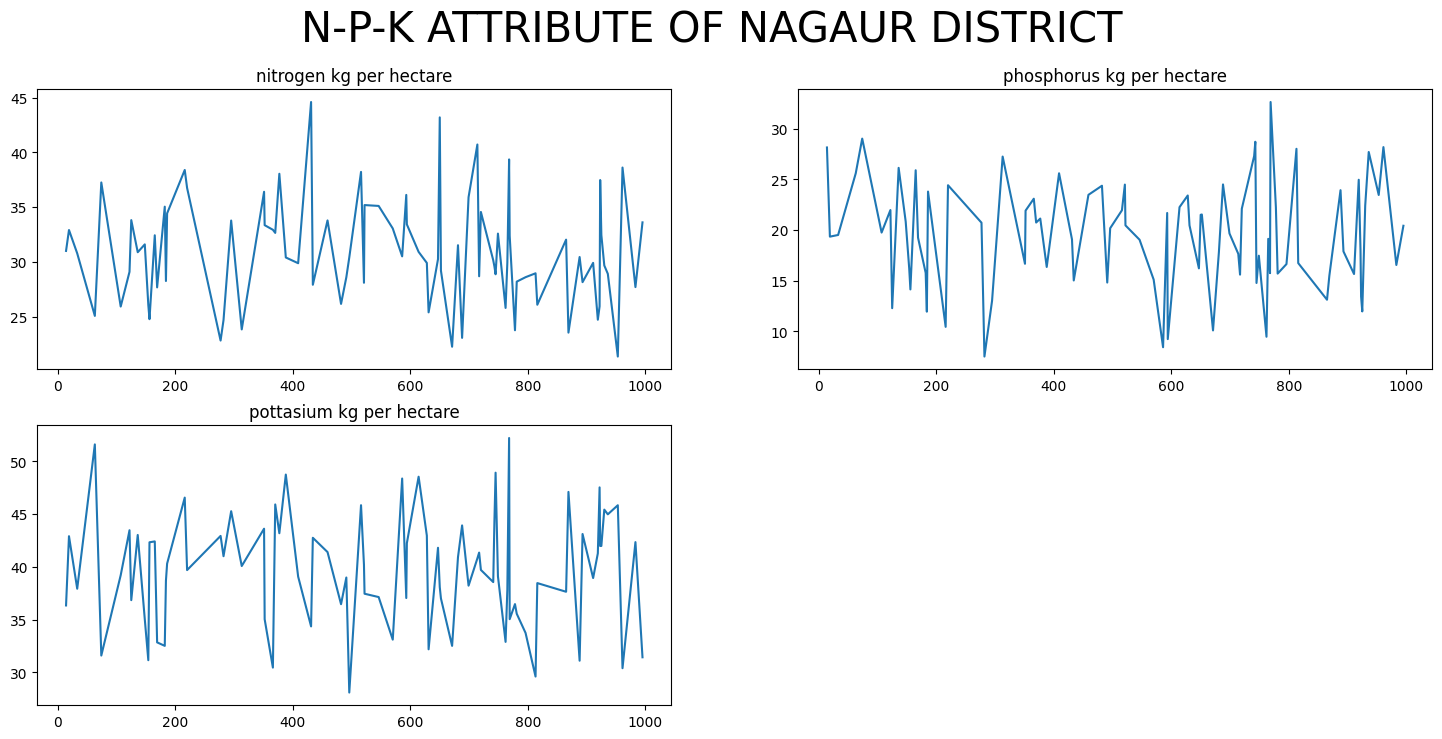

In [141]:
plt.figure(figsize=(18,8))
plt.suptitle('N-P-K ATTRIBUTE OF NAGAUR DISTRICT',fontsize=30)
plt.subplot(2,2,1)
plt.plot(df_Nagaur['Nitrogen Content (kg/ha)'])
plt.title('nitrogen kg per hectare')
plt.subplot(2,2,2)
plt.plot(df_Nagaur['Phosphorus Content (kg/ha)'])
plt.title('phosphorus kg per hectare')
plt.subplot(2,2,3)
plt.plot(df_Nagaur['Potassium Content (kg/ha)'])
plt.title('pottasium kg per hectare')

<h1><b>analysis on Sri Ganganagar</h1>

In [142]:
df_SriGanganagar

District            Soil Type  pH Level  Organic Matter (%)  \
46   Sri Ganganagar  Chalky (Calcareous)  7.291045            0.987096   
47   Sri Ganganagar          Nitrogenous  7.594740            2.503722   
55   Sri Ganganagar               Saline  8.177721            2.585099   
56   Sri Ganganagar               Saline  7.069148            2.015016   
62   Sri Ganganagar                Sandy  6.909063            2.224737   
..              ...                  ...       ...                 ...   
947  Sri Ganganagar  Chalky (Calcareous)  6.664119            3.355166   
952  Sri Ganganagar                 Clay  8.157113            2.356633   
959  Sri Ganganagar                 Clay  8.096793            1.329756   
984  Sri Ganganagar          Nitrogenous  8.155303            2.585551   
991  Sri Ganganagar                Sandy  8.549704            1.979376   

     Nitrogen Content (kg/ha)  Phosphorus Content (kg/ha)  \
46                  24.645738                   29.557095   
47                  23.725387                   20.923552   
55                  30.671482                   20.397989   
56                  19.238082                   24.382278   
62                  40.430235                   14.926203   
..                        ...                         ...   
947                 32.599355                   21.050042   
952                 24.870176                   23.036445   
959                 28.400869                   20.721550   
984                 23.717173                   26.446015   
991                 40.795606                   20.456574   

     Potassium Content (kg/ha)  
46                   33.597722  
47                   44.689578  
55                   42.770289  
56                   32.192534  
62                   38.192686  
..                         ...  
947                  43.075820  
952                  47.339252  
959                  30.831471  
984                  38.409207  
991                  38.097720  

[93 rows x 7 columns]

<Axes: >

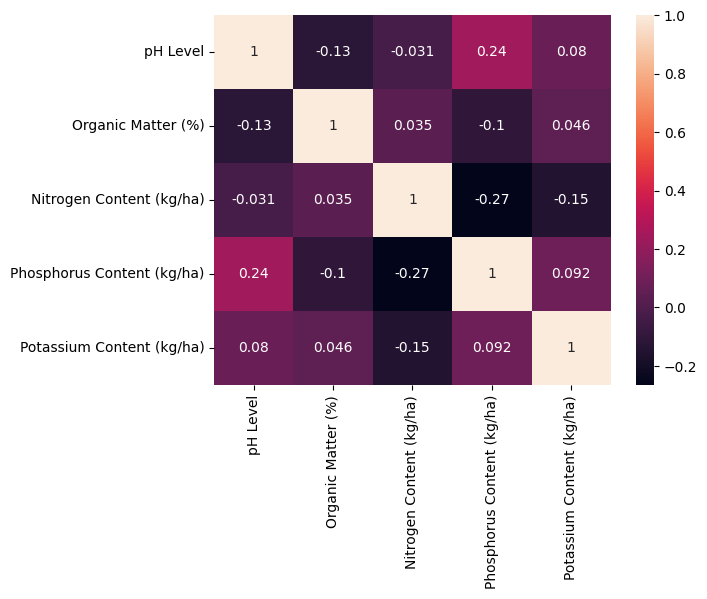

In [143]:
sns.heatmap(df_SriGanganagar.corr(numeric_only=True),annot=True)

In [145]:
df_SriGanganagar['Soil Type'].value_counts()

Soil Type
Nitrogenous            14
Saline                 14
Sandy                  13
Clay                   13
Alkaline               12
Chalky (Calcareous)    10
Black lava soil        10
Loamy                   7
Name: count, dtype: int64

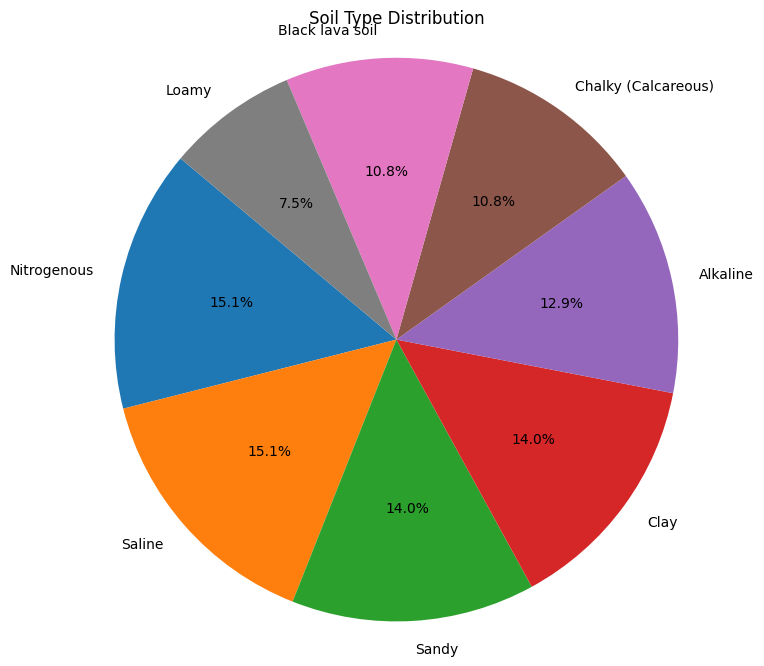

In [146]:
value_counts = df_SriGanganagar['Soil Type'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100
# Create the pie plot
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
# Add a title
plt.title('Soil Type Distribution')
# Show the plot
plt.show()

<Axes: xlabel='pH Level', ylabel='Count'>

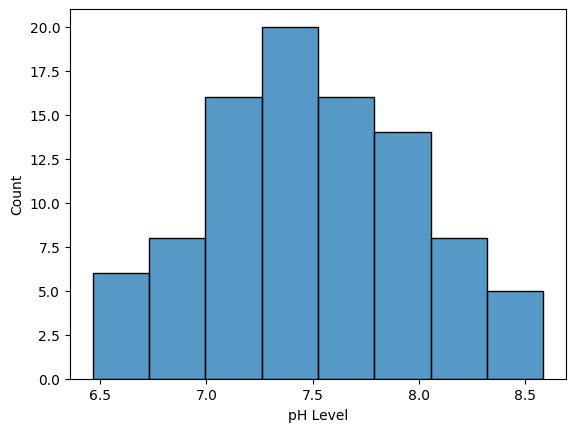

In [148]:
sns.histplot(df_SriGanganagar['pH Level'])

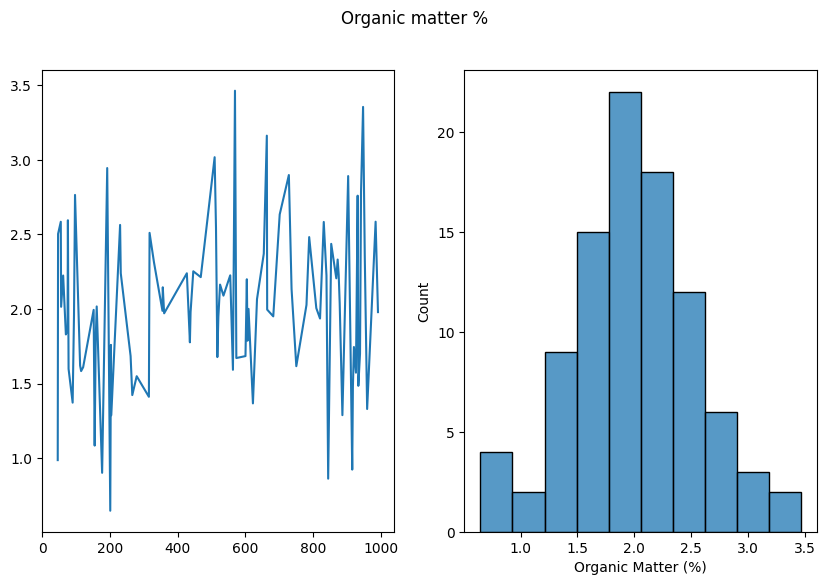

In [149]:
plt.figure(figsize=(10,6))
plt.suptitle('Organic matter % ')
plt.subplot(1,2,1)
plt.plot(df_SriGanganagar['Organic Matter (%)'])
plt.subplot(1,2,2)
sns.histplot(df_SriGanganagar['Organic Matter (%)'])
plt.show()

Text(0.5, 1.0, 'pottasium kg per hectare')

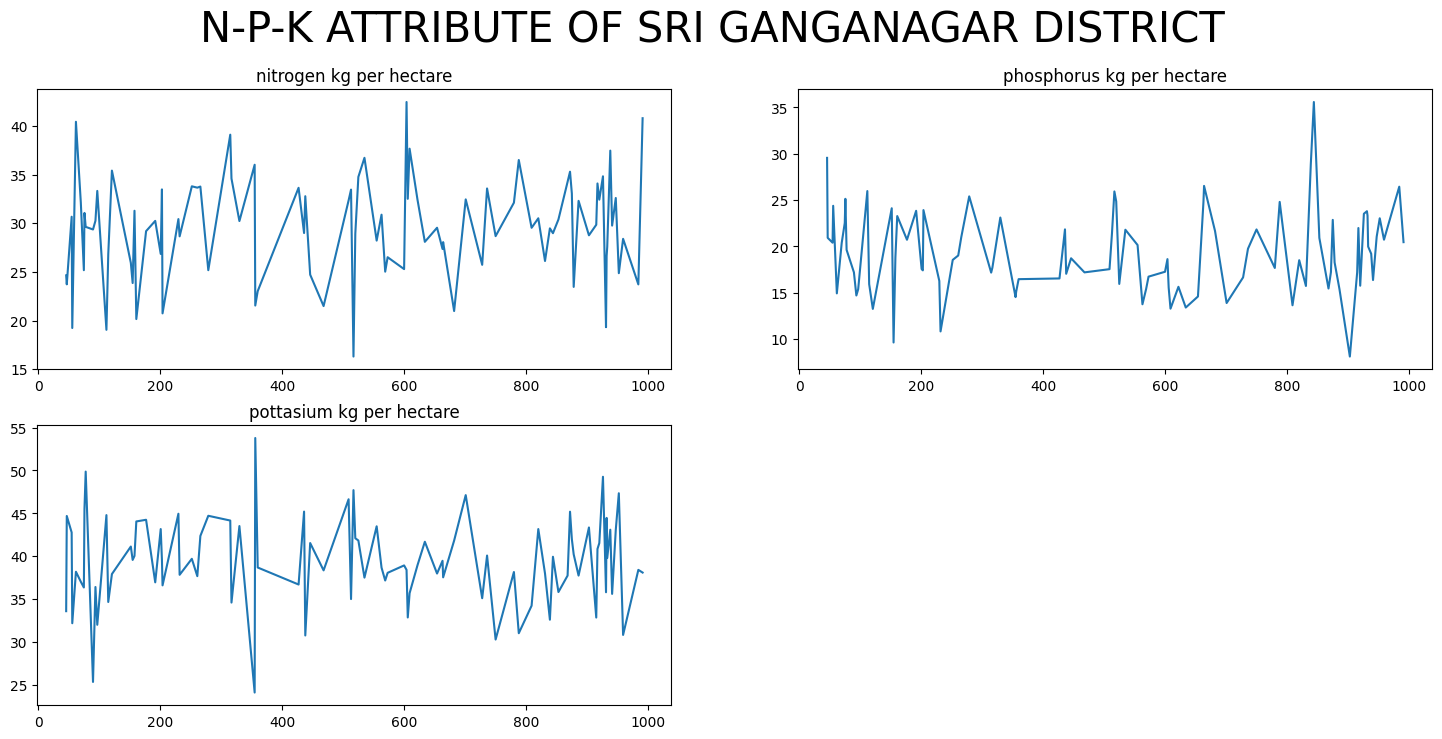

In [150]:
plt.figure(figsize=(18,8))
plt.suptitle('N-P-K ATTRIBUTE OF SRI GANGANAGAR DISTRICT',fontsize=30)
plt.subplot(2,2,1)
plt.plot(df_SriGanganagar['Nitrogen Content (kg/ha)'])
plt.title('nitrogen kg per hectare')
plt.subplot(2,2,2)
plt.plot(df_SriGanganagar['Phosphorus Content (kg/ha)'])
plt.title('phosphorus kg per hectare')
plt.subplot(2,2,3)
plt.plot(df_SriGanganagar['Potassium Content (kg/ha)'])
plt.title('pottasium kg per hectare')

<h1><b>analysis of udaipur</h1>

In [151]:
df_Udaipur

District            Soil Type  pH Level  Organic Matter (%)  \
9    Udaipur      Black lava soil  6.475029            2.579537   
10   Udaipur                Loamy  6.814163            1.645279   
11   Udaipur                Loamy  7.071614            1.722227   
15   Udaipur                Loamy  8.409031            2.387578   
25   Udaipur                Sandy  7.869827            1.045322   
..       ...                  ...       ...                 ...   
942  Udaipur                 Clay  7.666360            1.333426   
949  Udaipur  Chalky (Calcareous)  7.095055            2.709518   
955  Udaipur             Alkaline  7.801237            2.520029   
966  Udaipur                Loamy  7.403195            2.372293   
985  Udaipur                Sandy  7.800367            1.546892   

     Nitrogen Content (kg/ha)  Phosphorus Content (kg/ha)  \
9                   28.318726                   22.127450   
10                  28.557257                   16.081232   
11                  31.021945                   13.989252   
15                  32.765200                   21.170122   
25                  36.591512                   20.363403   
..                        ...                         ...   
942                 28.763320                   21.666153   
949                 31.466760                   23.649097   
955                 24.905650                   18.861145   
966                 33.209736                   18.648662   
985                 30.709900                   21.568616   

     Potassium Content (kg/ha)  
9                    45.986235  
10                   48.674683  
11                   38.021596  
15                   38.757357  
25                   37.942534  
..                         ...  
942                  46.495749  
949                  46.959604  
955                  35.299920  
966                  41.088591  
985                  32.576976  

[103 rows x 7 columns]

<Axes: >

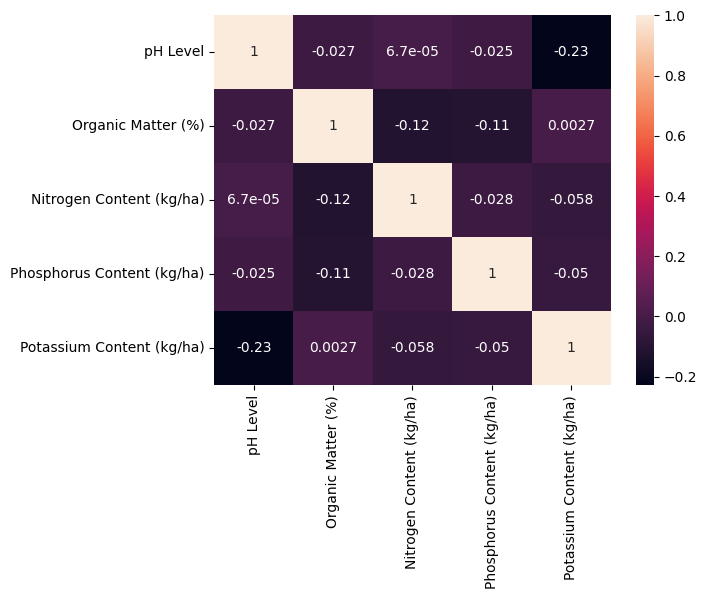

In [152]:
sns.heatmap(df_Udaipur.corr(numeric_only=True),annot=True)

In [153]:
df_Udaipur['Soil Type'].value_counts()

Soil Type
Black lava soil        19
Loamy                  15
Alkaline               14
Nitrogenous            13
Saline                 13
Sandy                  12
Clay                   10
Chalky (Calcareous)     7
Name: count, dtype: int64

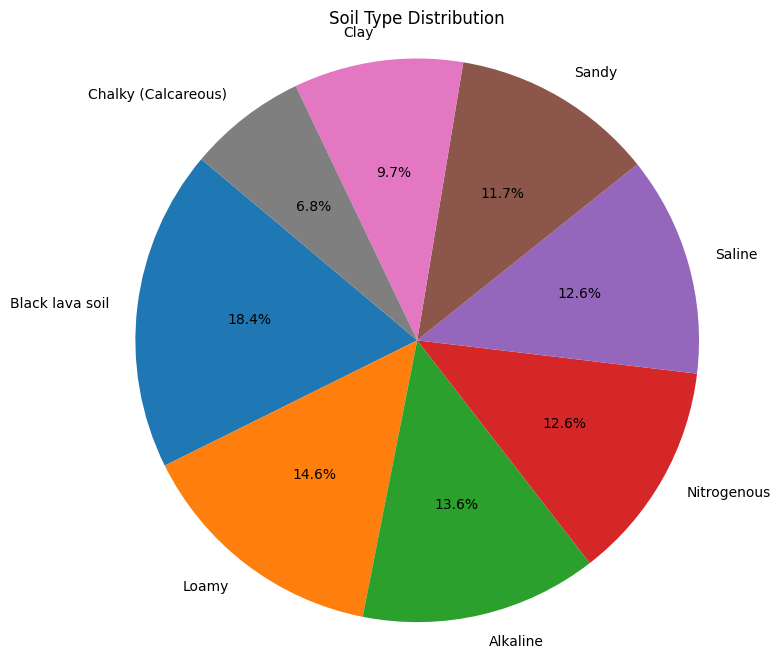

In [154]:
value_counts = df_Udaipur['Soil Type'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100
# Create the pie plot
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
# Add a title
plt.title('Soil Type Distribution')
# Show the plot
plt.show()

<Axes: xlabel='pH Level', ylabel='Count'>

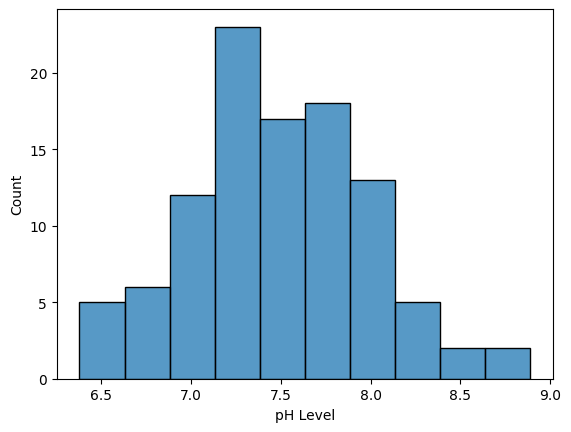

In [156]:
sns.histplot(df_Udaipur['pH Level'])

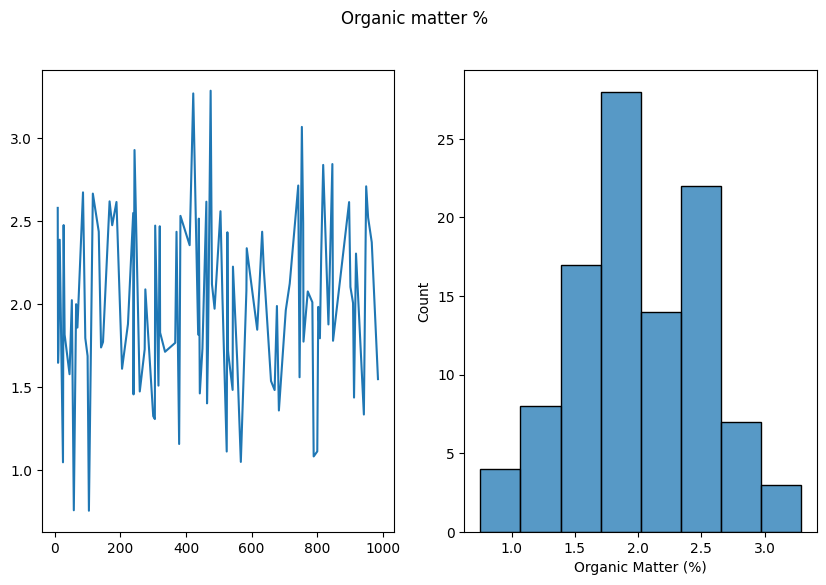

In [157]:
plt.figure(figsize=(10,6))
plt.suptitle('Organic matter % ')
plt.subplot(1,2,1)
plt.plot(df_Udaipur['Organic Matter (%)'])
plt.subplot(1,2,2)
sns.histplot(df_Udaipur['Organic Matter (%)'])
plt.show()

Text(0.5, 1.0, 'pottasium kg per hectare')

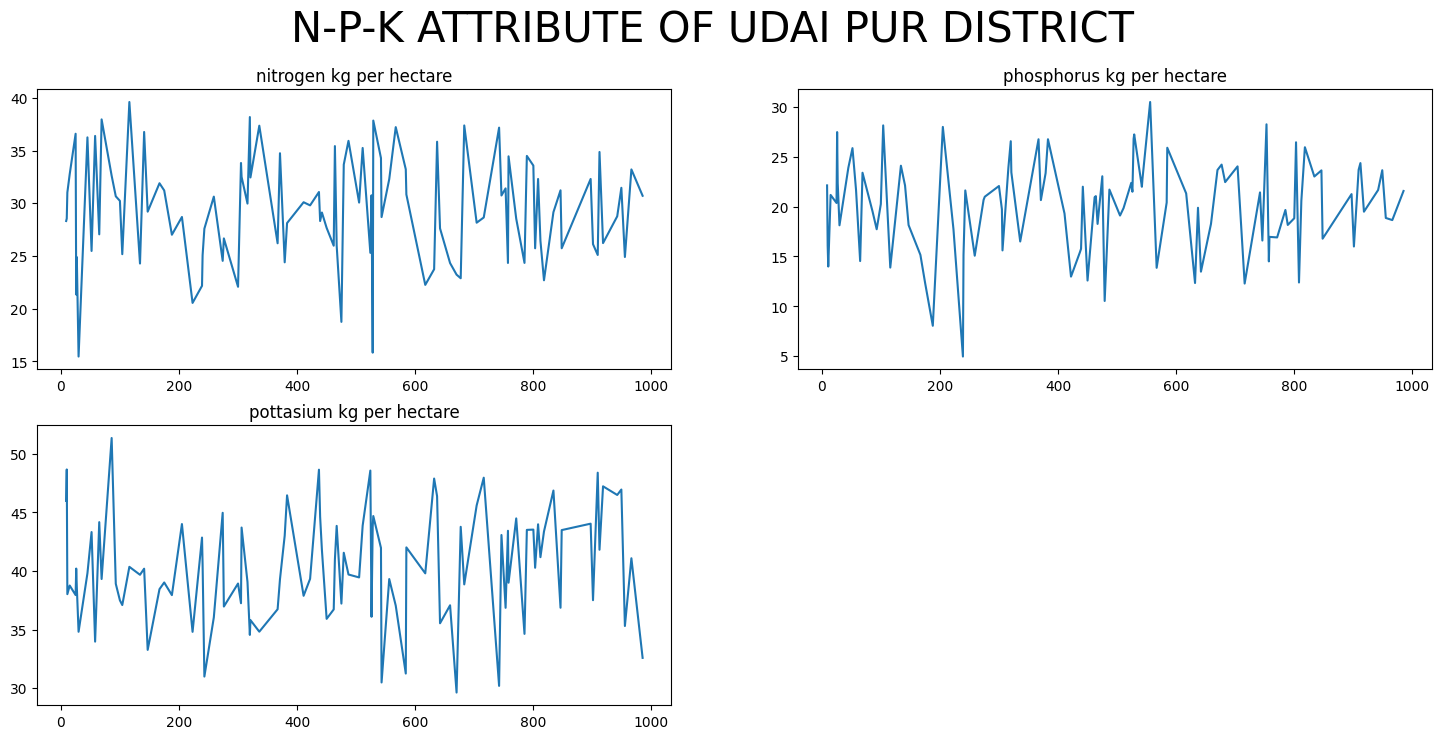

In [158]:
plt.figure(figsize=(18,8))
plt.suptitle('N-P-K ATTRIBUTE OF UDAI PUR DISTRICT',fontsize=30)
plt.subplot(2,2,1)
plt.plot(df_Udaipur['Nitrogen Content (kg/ha)'])
plt.title('nitrogen kg per hectare')
plt.subplot(2,2,2)
plt.plot(df_Udaipur['Phosphorus Content (kg/ha)'])
plt.title('phosphorus kg per hectare')
plt.subplot(2,2,3)
plt.plot(df_Udaipur['Potassium Content (kg/ha)'])
plt.title('pottasium kg per hectare')

<h1><b>Lets take a final look on the data</h1>

In [159]:
df_Ajmer.describe()

pH Level  Organic Matter (%)  Nitrogen Content (kg/ha)  \
count  106.000000          106.000000                106.000000   
mean     7.472186            2.020277                 30.398360   
std      0.560703            0.583519                  5.666926   
min      5.889492            0.814170                 11.994574   
25%      7.182275            1.598421                 27.296663   
50%      7.421025            2.041772                 30.172899   
75%      7.866415            2.424260                 33.533516   
max      8.971524            3.621546                 44.326060   

       Phosphorus Content (kg/ha)  Potassium Content (kg/ha)  
count                  106.000000                 106.000000  
mean                    19.666500                  39.963523  
std                      4.666778                   4.872117  
min                      9.151613                  25.838370  
25%                     16.616638                  36.940749  
50%                     19.923227                  39.932305  
75%                     22.546405                  42.665454  
max                     33.034296                  54.121102

In [160]:
df_Alwar.describe()

pH Level  Organic Matter (%)  Nitrogen Content (kg/ha)  \
count  98.000000           98.000000                 98.000000   
mean    7.553004            2.014300                 29.621343   
std     0.495700            0.470426                  5.416641   
min     6.298166            1.169458                 17.341153   
25%     7.198010            1.626932                 25.799661   
50%     7.577375            1.996433                 29.785753   
75%     7.899442            2.273132                 33.343779   
max     8.527097            3.293954                 45.564551   

       Phosphorus Content (kg/ha)  Potassium Content (kg/ha)  
count                   98.000000                  98.000000  
mean                    19.411370                  40.176260  
std                      5.318233                   4.651363  
min                      7.535948                  30.263288  
25%                     16.559680                  36.885188  
50%                     19.494072                  39.846472  
75%                     22.716962                  43.704165  
max                     33.210060                  53.609561

In [161]:
df_Bhilwara.describe()

pH Level  Organic Matter (%)  Nitrogen Content (kg/ha)  \
count  85.000000           85.000000                 85.000000   
mean    7.493613            2.000057                 29.195424   
std     0.535725            0.520934                  4.668178   
min     6.445081            0.662716                 18.901110   
25%     7.088962            1.704303                 25.815098   
50%     7.511598            2.036668                 28.865288   
75%     7.874873            2.345236                 32.494416   
max     8.748708            3.549150                 39.560027   

       Phosphorus Content (kg/ha)  Potassium Content (kg/ha)  
count                   85.000000                  85.000000  
mean                    20.775882                  39.453946  
std                      5.202101                   4.999578  
min                      6.462281                  29.110161  
25%                     17.367224                  35.807497  
50%                     20.970260                  39.112020  
75%                     24.835891                  42.254813  
max                     34.677031                  54.678290

In [162]:
df_Hanumangarh.describe()

pH Level  Organic Matter (%)  Nitrogen Content (kg/ha)  \
count  85.000000           85.000000                 85.000000   
mean    7.551773            1.904887                 30.435180   
std     0.475100            0.393049                  5.022732   
min     6.255836            1.184332                 20.252191   
25%     7.223411            1.603270                 26.631049   
50%     7.579045            1.908350                 29.964775   
75%     7.874950            2.155555                 34.468488   
max     8.526486            2.710252                 40.920484   

       Phosphorus Content (kg/ha)  Potassium Content (kg/ha)  
count                   85.000000                  85.000000  
mean                    19.834993                  40.279589  
std                      5.200064                   5.355776  
min                      5.749849                  26.436937  
25%                     16.259520                  37.561833  
50%                     20.096906                  40.861272  
75%                     22.767848                  44.113914  
max                     33.334526                  52.261850

In [163]:
df_jaipur.describe()

pH Level  Organic Matter (%)  Nitrogen Content (kg/ha)  \
count  103.000000          103.000000                103.000000   
mean     7.455707            2.064744                 29.634243   
std      0.546523            0.485369                  5.522268   
min      6.223225            0.690933                 15.726867   
25%      7.047290            1.732204                 25.994520   
50%      7.462827            2.015698                 29.186481   
75%      7.835352            2.384881                 33.038542   
max      8.750450            3.202419                 45.760284   

       Phosphorus Content (kg/ha)  Potassium Content (kg/ha)  
count                  103.000000                 103.000000  
mean                    19.837221                  39.831310  
std                      4.869795                   4.778198  
min                      7.868040                  27.823438  
25%                     16.326414                  36.867799  
50%                     19.887820                  40.072545  
75%                     23.799572                  42.698950  
max                     31.357249                  50.556482

In [164]:
df_Jodhpur.describe()

pH Level  Organic Matter (%)  Nitrogen Content (kg/ha)  \
count  128.000000          128.000000                128.000000   
mean     7.454888            1.985176                 29.906864   
std      0.539340            0.523773                  4.984886   
min      5.977672            0.738861                 16.740860   
25%      7.107771            1.658080                 25.816402   
50%      7.436855            2.003795                 29.363363   
75%      7.835371            2.283551                 32.686102   
max      8.697181            3.434202                 44.073272   

       Phosphorus Content (kg/ha)  Potassium Content (kg/ha)  
count                  128.000000                 128.000000  
mean                    19.495916                  39.576122  
std                      5.795027                   4.975501  
min                      5.804607                  29.380036  
25%                     15.211109                  36.262117  
50%                     19.718175                  39.103381  
75%                     23.723961                  43.248663  
max                     33.515138                  51.908568

In [165]:
df_Kota.describe()

pH Level  Organic Matter (%)  Nitrogen Content (kg/ha)  \
count  114.000000          114.000000                114.000000   
mean     7.460185            1.938007                 29.794718   
std      0.540864            0.475870                  5.439197   
min      5.914787            0.877207                 15.502431   
25%      7.078724            1.633322                 27.283521   
50%      7.460024            1.914883                 29.819414   
75%      7.809647            2.280864                 33.229412   
max      9.038430            3.242595                 42.802515   

       Phosphorus Content (kg/ha)  Potassium Content (kg/ha)  
count                  114.000000                 114.000000  
mean                    19.470072                  40.096340  
std                      4.816409                   4.269064  
min                     10.005555                  30.798668  
25%                     15.790433                  37.205996  
50%                     19.726601                  40.336458  
75%                     22.492135                  43.054973  
max                     30.413302                  51.385432

In [166]:
df_SriGanganagar.describe()

pH Level  Organic Matter (%)  Nitrogen Content (kg/ha)  \
count  93.000000           93.000000                 93.000000   
mean    7.512621            2.017380                 29.627871   
std     0.478104            0.551813                  5.194753   
min     6.464311            0.647804                 16.304299   
25%     7.200089            1.671433                 26.124775   
50%     7.469798            2.000988                 29.761004   
75%     7.840681            2.331823                 33.324636   
max     8.584968            3.463635                 42.460920   

       Phosphorus Content (kg/ha)  Potassium Content (kg/ha)  
count                   93.000000                  93.000000  
mean                    19.340775                  39.352132  
std                      4.559244                   5.103226  
min                      8.105020                  24.116481  
25%                     15.945530                  36.606785  
50%                     18.715274                  38.929248  
75%                     22.529828                  43.091803  
max                     35.588406                  53.776089

In [170]:
df_temp=df.loc[:,df.columns!='Soil Type']

In [171]:
df_temp.groupby('District').mean()

pH Level  Organic Matter (%)  Nitrogen Content (kg/ha)  \
District                                                                 
Ajmer           7.472186            2.020277                 30.398360   
Alwar           7.553004            2.014300                 29.621343   
Bhilwara        7.493613            2.000057                 29.195424   
Hanumangarh     7.551773            1.904887                 30.435180   
Jaipur          7.455707            2.064744                 29.634243   
Jodhpur         7.454888            1.985176                 29.906864   
Kota            7.460185            1.938007                 29.794718   
Nagaur          7.527281            1.995183                 30.909347   
Sri Ganganagar  7.512621            2.017380                 29.627871   
Udaipur         7.507106            1.992333                 29.416978   

                Phosphorus Content (kg/ha)  Potassium Content (kg/ha)  
District                                                               
Ajmer                            19.666500                  39.963523  
Alwar                            19.411370                  40.176260  
Bhilwara                         20.775882                  39.453946  
Hanumangarh                      19.834993                  40.279589  
Jaipur                           19.837221                  39.831310  
Jodhpur                          19.495916                  39.576122  
Kota                             19.470072                  40.096340  
Nagaur                           19.609709                  39.698829  
Sri Ganganagar                   19.340775                  39.352132  
Udaipur                          20.070177                  40.326699

In [172]:
df_temp=df.loc[:,df.columns!='District']

In [174]:
df_temp.groupby('Soil Type').mean()

pH Level  Organic Matter (%)  Nitrogen Content (kg/ha)  \
Soil Type                                                                     
Alkaline             7.592802            1.970451                 29.611645   
Black lava soil      7.515361            1.997554                 29.309727   
Chalky (Calcareous)  7.423194            1.936928                 30.085445   
Clay                 7.432185            2.094807                 29.707380   
Loamy                7.564105            2.040614                 30.519322   
Nitrogenous          7.405290            1.974997                 29.850310   
Saline               7.530385            1.965008                 29.854063   
Sandy                7.487491            1.958704                 30.327597   

                     Phosphorus Content (kg/ha)  Potassium Content (kg/ha)  
Soil Type                                                                   
Alkaline                              20.102388                  39.791115  
Black lava soil                       20.036111                  40.503668  
Chalky (Calcareous)                   19.744676                  39.777619  
Clay                                  19.079858                  39.910324  
Loamy                                 19.256549                  39.712199  
Nitrogenous                           19.603439                  39.828059  
Saline                                20.038749                  40.019283  
Sandy                                 19.907666                  39.312637

In [176]:
grouped_data = df.groupby(['District', 'Soil Type']).mean()
pd.set_option('display.max_rows', 1000)
grouped_data

pH Level  Organic Matter (%)  \
District       Soil Type                                           
Ajmer          Alkaline             7.559221            2.025108   
               Black lava soil      7.467226            2.182744   
               Chalky (Calcareous)  7.585004            1.688812   
               Clay                 7.313454            2.025314   
               Loamy                7.650348            2.243714   
               Nitrogenous          7.294822            2.022957   
               Saline               7.553718            2.093061   
               Sandy                7.377181            1.847003   
Alwar          Alkaline             7.744578            1.767108   
               Black lava soil      7.524858            1.922791   
               Chalky (Calcareous)  7.623862            2.275296   
               Clay                 7.604872            2.153282   
               Loamy                7.692620            1.923177   
               Nitrogenous          7.426245            2.009772   
               Saline               7.485325            2.179536   
               Sandy                7.456183            1.875505   
Bhilwara       Alkaline             7.499764            1.902004   
               Black lava soil      7.578149            2.034696   
               Chalky (Calcareous)  7.636710            2.252040   
               Clay                 7.101795            2.275334   
               Loamy                7.332672            2.002102   
               Nitrogenous          7.347523            1.920284   
               Saline               7.540033            1.863951   
               Sandy                7.897935            2.012332   
Hanumangarh    Alkaline             7.638860            2.069867   
               Black lava soil      7.665222            1.914405   
               Chalky (Calcareous)  7.538516            1.814235   
               Clay                 7.634317            1.901616   
               Loamy                7.433943            1.964397   
               Nitrogenous          7.624918            1.846360   
               Saline               7.421377            1.792853   
               Sandy                7.170727            1.793338   
Jaipur         Alkaline             7.582161            2.072962   
               Black lava soil      7.294427            2.067576   
               Chalky (Calcareous)  7.019872            2.043207   
               Clay                 7.537831            2.094355   
               Loamy                7.638100            2.295995   
               Nitrogenous          7.627767            2.021634   
               Saline               7.394710            1.806680   
               Sandy                7.456094            2.031560   
Jodhpur        Alkaline             7.563501            2.019315   
               Black lava soil      7.611537            2.033532   
               Chalky (Calcareous)  7.349132            1.830636   
               Clay                 7.308792            2.059766   
               Loamy                7.631705            2.057200   
               Nitrogenous          7.252885            1.988984   
               Saline               7.464094            1.912638   
               Sandy                7.430646            1.935755   
Kota           Alkaline             7.531146            1.886733   
               Black lava soil      7.535451            1.824571   
               Chalky (Calcareous)  7.463635            2.044612   
               Clay                 7.317266            1.956148   
               Loamy                7.457568            1.924777   
               Nitrogenous          7.323029            1.865805   
               Saline               7.724942            2.004779   
               Sandy                7.279352            1.951076   
Nagaur         Alkaline             7.649484            1.743152   
               Black lav

In [178]:
soil_type_counts = pd.DataFrame(df.groupby(['District', 'Soil Type']).size())
soil_type_counts

0
District       Soil Type              
Ajmer          Alkaline             11
               Black lava soil      18
               Chalky (Calcareous)  11
               Clay                 12
               Loamy                12
               Nitrogenous          10
               Saline               14
               Sandy                18
Alwar          Alkaline              9
               Black lava soil      18
               Chalky (Calcareous)   8
               Clay                 13
               Loamy                10
               Nitrogenous          14
               Saline               15
               Sandy                11
Bhilwara       Alkaline             17
               Black lava soil       9
               Chalky (Calcareous)   7
               Clay                  8
               Loamy                 8
               Nitrogenous          14
               Saline               12
               Sandy                10
Hanumangarh    Alkaline             14
               Black lava soil      11
               Chalky (Calcareous)   9
               Clay                 12
               Loamy                12
               Nitrogenous          14
               Saline                8
               Sandy                 5
Jaipur         Alkaline             14
               Black lava soil      11
               Chalky (Calcareous)  12
               Clay                 14
               Loamy                16
               Nitrogenous          11
               Saline               12
               Sandy                13
Jodhpur        Alkaline             19
               Black lava soil      11
               Chalky (Calcareous)  14
               Clay                 21
               Loamy                19
               Nitrogenous          12
               Saline               18
               Sandy                14
Kota           Alkaline              9
               Black lava soil      18
               Chalky (Calcareous)  19
               Clay                 20
               Loamy                10
               Nitrogenous          13
               Saline               16
               Sandy                 9
Nagaur         Alkaline              8
               Black lava soil      19
               Chalky (Calcareous)  10
               Clay                  7
               Loamy                 8
               Nitrogenous           8
               Saline               13
               Sandy                12
Sri Ganganagar Alkaline             12
               Black lava soil      10
               Chalky (Calcareous)  10
               Clay                 13
               Loamy                 7
               Nitrogenous          14
               Saline               14
               Sandy                13
Udaipur        Alkaline             14
               Black lava soil      19
               Chalky (Calcareous)   7
               Clay                 10
               Loamy                15
               Nitrogenous          13
               Saline               13
               Sandy                12

In [183]:
min_nitrogen = pd.DataFrame(df.groupby(['District','Soil Type'])['Nitrogen Content (kg/ha)'].min())
min_nitrogen

Nitrogen Content (kg/ha)
District       Soil Type                                    
Ajmer          Alkaline                            23.817609
               Black lava soil                     15.812468
               Chalky (Calcareous)                 26.134851
               Clay                                11.994574
               Loamy                               25.616515
               Nitrogenous                         22.096980
               Saline                              19.567612
               Sandy                               23.545289
Alwar          Alkaline                            20.022341
               Black lava soil                     21.354086
               Chalky (Calcareous)                 22.049291
               Clay                                20.108874
               Loamy                               22.206065
               Nitrogenous                         22.532451
               Saline                              22.519206
               Sandy                               17.341153
Bhilwara       Alkaline                            20.122561
               Black lava soil                     18.901110
               Chalky (Calcareous)                 24.683228
               Clay                                20.569356
               Loamy                               23.618478
               Nitrogenous                         19.356330
               Saline                              21.245122
               Sandy                               26.794429
Hanumangarh    Alkaline                            20.252191
               Black lava soil                     24.769395
               Chalky (Calcareous)                 24.240012
               Clay                                23.207130
               Loamy                               24.484078
               Nitrogenous                         22.780372
               Saline                              21.310977
               Sandy                               25.570146
Jaipur         Alkaline                            20.894570
               Black lava soil                     24.518898
               Chalky (Calcareous)                 20.253141
               Clay                                15.839222
               Loamy                               15.726867
               Nitrogenous                         24.029067
               Saline                              21.021784
               Sandy                               24.095138
Jodhpur        Alkaline                            21.657004
               Black lava soil                     24.957756
               Chalky (Calcareous)                 23.875001
               Clay                                21.147594
               Loamy                               16.740860
               Nitrogenous                         20.584249
               Saline                              24.244231
               Sandy                               20.164651
Kota           Alkaline                            19.471765
               Black lava soil                     18.993783
               Chalky (Calcareous)                 20.781032
               Clay                                21.030538
               Loamy                               18.912045
               Nitrogenous                         19.907561
               Saline                              15.502431
               Sandy                               21.920566
Nagaur         Alkaline                            24.707797
               Black lava soil                     22.275320
               Chalky (Calcareous)                 25.088482
               Clay                                21.379691
               Loamy                               25.812971
               Nitrogenous                         26.103123
               Saline                              23.854082
               Sandy                               22.836644
Sri Gangan

In [185]:
min_phosphorus = pd.DataFrame(df.groupby(['District', 'Soil Type'])['Phosphorus Content (kg/ha)'].min())
min_phosphorus

Phosphorus Content (kg/ha)
District       Soil Type                                      
Ajmer          Alkaline                              10.413256
               Black lava soil                       12.087860
               Chalky (Calcareous)                    9.151613
               Clay                                  15.168768
               Loamy                                 10.454013
               Nitrogenous                            9.913306
               Saline                                10.267374
               Sandy                                 10.964793
Alwar          Alkaline                              11.261817
               Black lava soil                       11.635530
               Chalky (Calcareous)                    7.535948
               Clay                                   7.560890
               Loamy                                 11.371144
               Nitrogenous                            9.380262
               Saline                                12.963533
               Sandy                                  9.337022
Bhilwara       Alkaline                              13.346474
               Black lava soil                       10.244491
               Chalky (Calcareous)                   17.926847
               Clay                                  16.750866
               Loamy                                 12.975915
               Nitrogenous                            6.462281
               Saline                                15.356040
               Sandy                                 11.666183
Hanumangarh    Alkaline                              12.607265
               Black lava soil                       13.174891
               Chalky (Calcareous)                   15.256257
               Clay                                   6.130925
               Loamy                                 11.916433
               Nitrogenous                           13.299376
               Saline                                 9.548486
               Sandy                                  5.749849
Jaipur         Alkaline                               8.736033
               Black lava soil                       11.348686
               Chalky (Calcareous)                    9.748213
               Clay                                  11.068123
               Loamy                                 13.247220
               Nitrogenous                            7.868040
               Saline                                14.130633
               Sandy                                 14.241594
Jodhpur        Alkaline                              11.263892
               Black lava soil                        9.028088
               Chalky (Calcareous)                   11.173062
               Clay                                   8.571114
               Loamy                                  8.162612
               Nitrogenous                            6.483260
               Saline                                 5.804607
               Sandy                                  9.142143
Kota           Alkaline                              14.870659
               Black lava soil                       10.005555
               Chalky (Calcareous)                   13.089912
               Clay                                  13.051099
               Loamy                                 10.624963
               Nitrogenous                           15.780731
               Saline                                11.030394
               Sandy                                 10.841589
Nagaur         Alkaline                               7.509695
               Black lava soil                        9.231347
               Chalky (Calcareous)                   10.441797
               Clay                                  11.942163
               Loamy                                  9.465554
               Nitrogenous                            8.429780
    

In [186]:
min_pottasium = pd.DataFrame(df.groupby(['District', 'Soil Type'])['Potassium Content (kg/ha)'].min())
min_pottasium

Potassium Content (kg/ha)
District       Soil Type                                     
Ajmer          Alkaline                             32.644368
               Black lava soil                      33.640405
               Chalky (Calcareous)                  34.029053
               Clay                                 33.961203
               Loamy                                30.650918
               Nitrogenous                          25.838370
               Saline                               30.953661
               Sandy                                32.627487
Alwar          Alkaline                             35.149379
               Black lava soil                      30.263288
               Chalky (Calcareous)                  35.485955
               Clay                                 30.851591
               Loamy                                31.029282
               Nitrogenous                          32.606114
               Saline                               31.863441
               Sandy                                35.944996
Bhilwara       Alkaline                             29.110161
               Black lava soil                      33.649695
               Chalky (Calcareous)                  34.678900
               Clay                                 33.165708
               Loamy                                32.467374
               Nitrogenous                          33.388263
               Saline                               33.260021
               Sandy                                32.526219
Hanumangarh    Alkaline                             28.908261
               Black lava soil                      26.436937
               Chalky (Calcareous)                  35.238418
               Clay                                 28.398422
               Loamy                                34.359687
               Nitrogenous                          28.419281
               Saline                               35.100372
               Sandy                                37.355008
Jaipur         Alkaline                             32.215245
               Black lava soil                      36.440134
               Chalky (Calcareous)                  32.724727
               Clay                                 33.263730
               Loamy                                27.823438
               Nitrogenous                          28.065351
               Saline                               28.915906
               Sandy                                29.838231
Jodhpur        Alkaline                             29.380036
               Black lava soil                      32.639815
               Chalky (Calcareous)                  30.799611
               Clay                                 29.752628
               Loamy                                30.241985
               Nitrogenous                          34.869596
               Saline                               35.015342
               Sandy                                31.154748
Kota           Alkaline                             34.104459
               Black lava soil                      34.920606
               Chalky (Calcareous)                  32.999646
               Clay                                 30.798668
               Loamy                                33.604846
               Nitrogenous                          31.281637
               Saline                               31.265522
               Sandy                                31.119941
Nagaur         Alkaline                             34.349106
               Black lava soil                      29.596297
               Chalky (Calcareous)                  32.834241
               Clay                                 28.078466
               Loamy                                30.443416
               Nitrogenous                          30.386141
               Saline                               31.421458
      

In [193]:
pivot_df = df.pivot_table(index=['District', 'Soil Type'], values=['Nitrogen Content (kg/ha)', 'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)'])
pivot_df

Nitrogen Content (kg/ha)  \
District       Soil Type                                       
Ajmer          Alkaline                            31.549478   
               Black lava soil                     29.537820   
               Chalky (Calcareous)                 30.800749   
               Clay                                30.949945   
               Loamy                               31.437119   
               Nitrogenous                         29.430454   
               Saline                              29.940083   
               Sandy                               30.143465   
Alwar          Alkaline                            29.929649   
               Black lava soil                     30.016915   
               Chalky (Calcareous)                 28.546386   
               Clay                                28.736107   
               Loamy                               31.225862   
               Nitrogenous                         30.468214   
               Saline                              29.089541   
               Sandy                               28.738466   
Bhilwara       Alkaline                            30.670359   
               Black lava soil                     31.145907   
               Chalky (Calcareous)                 27.937506   
               Clay                                28.040194   
               Loamy                               26.590107   
               Nitrogenous                         28.067781   
               Saline                              28.104306   
               Sandy                               31.709620   
Hanumangarh    Alkaline                            28.308151   
               Black lava soil                     29.823043   
               Chalky (Calcareous)                 31.111971   
               Clay                                32.839380   
               Loamy                               31.959291   
               Nitrogenous                         30.558587   
               Saline                              28.307407   
               Sandy                               30.150293   
Jaipur         Alkaline                            28.022644   
               Black lava soil                     32.313099   
               Chalky (Calcareous)                 29.430505   
               Clay                                27.838295   
               Loamy                               31.422000   
               Nitrogenous                         29.951719   
               Saline                              27.668449   
               Sandy                               30.570881   
Jodhpur        Alkaline                            30.572894   
               Black lava soil                     27.959607   
               Chalky (Calcareous)                 29.737534   
               Clay                                29.799215   
               Loamy                               29.508228   
               Nitrogenous                         29.133205   
               Saline                              31.085032   
               Sandy                               30.553108   
Kota           Alkaline                            28.461964   
               Black lava soil                     28.786189   
               Chalky (Calcareous)                 30.182883   
               Clay                                30.389394   
               Loamy                               29.936223   
               Nitrogenous                         30.800438   
               Saline                              30.076084   
               Sandy                               28.893431   
Nagaur         Alkaline                            31.360437   
               Black lava soil                     28.978286   
               Chalky (Calcareous)                 32.263292   
               Clay                                29.011861   
               Loamy                               29.982133   
    

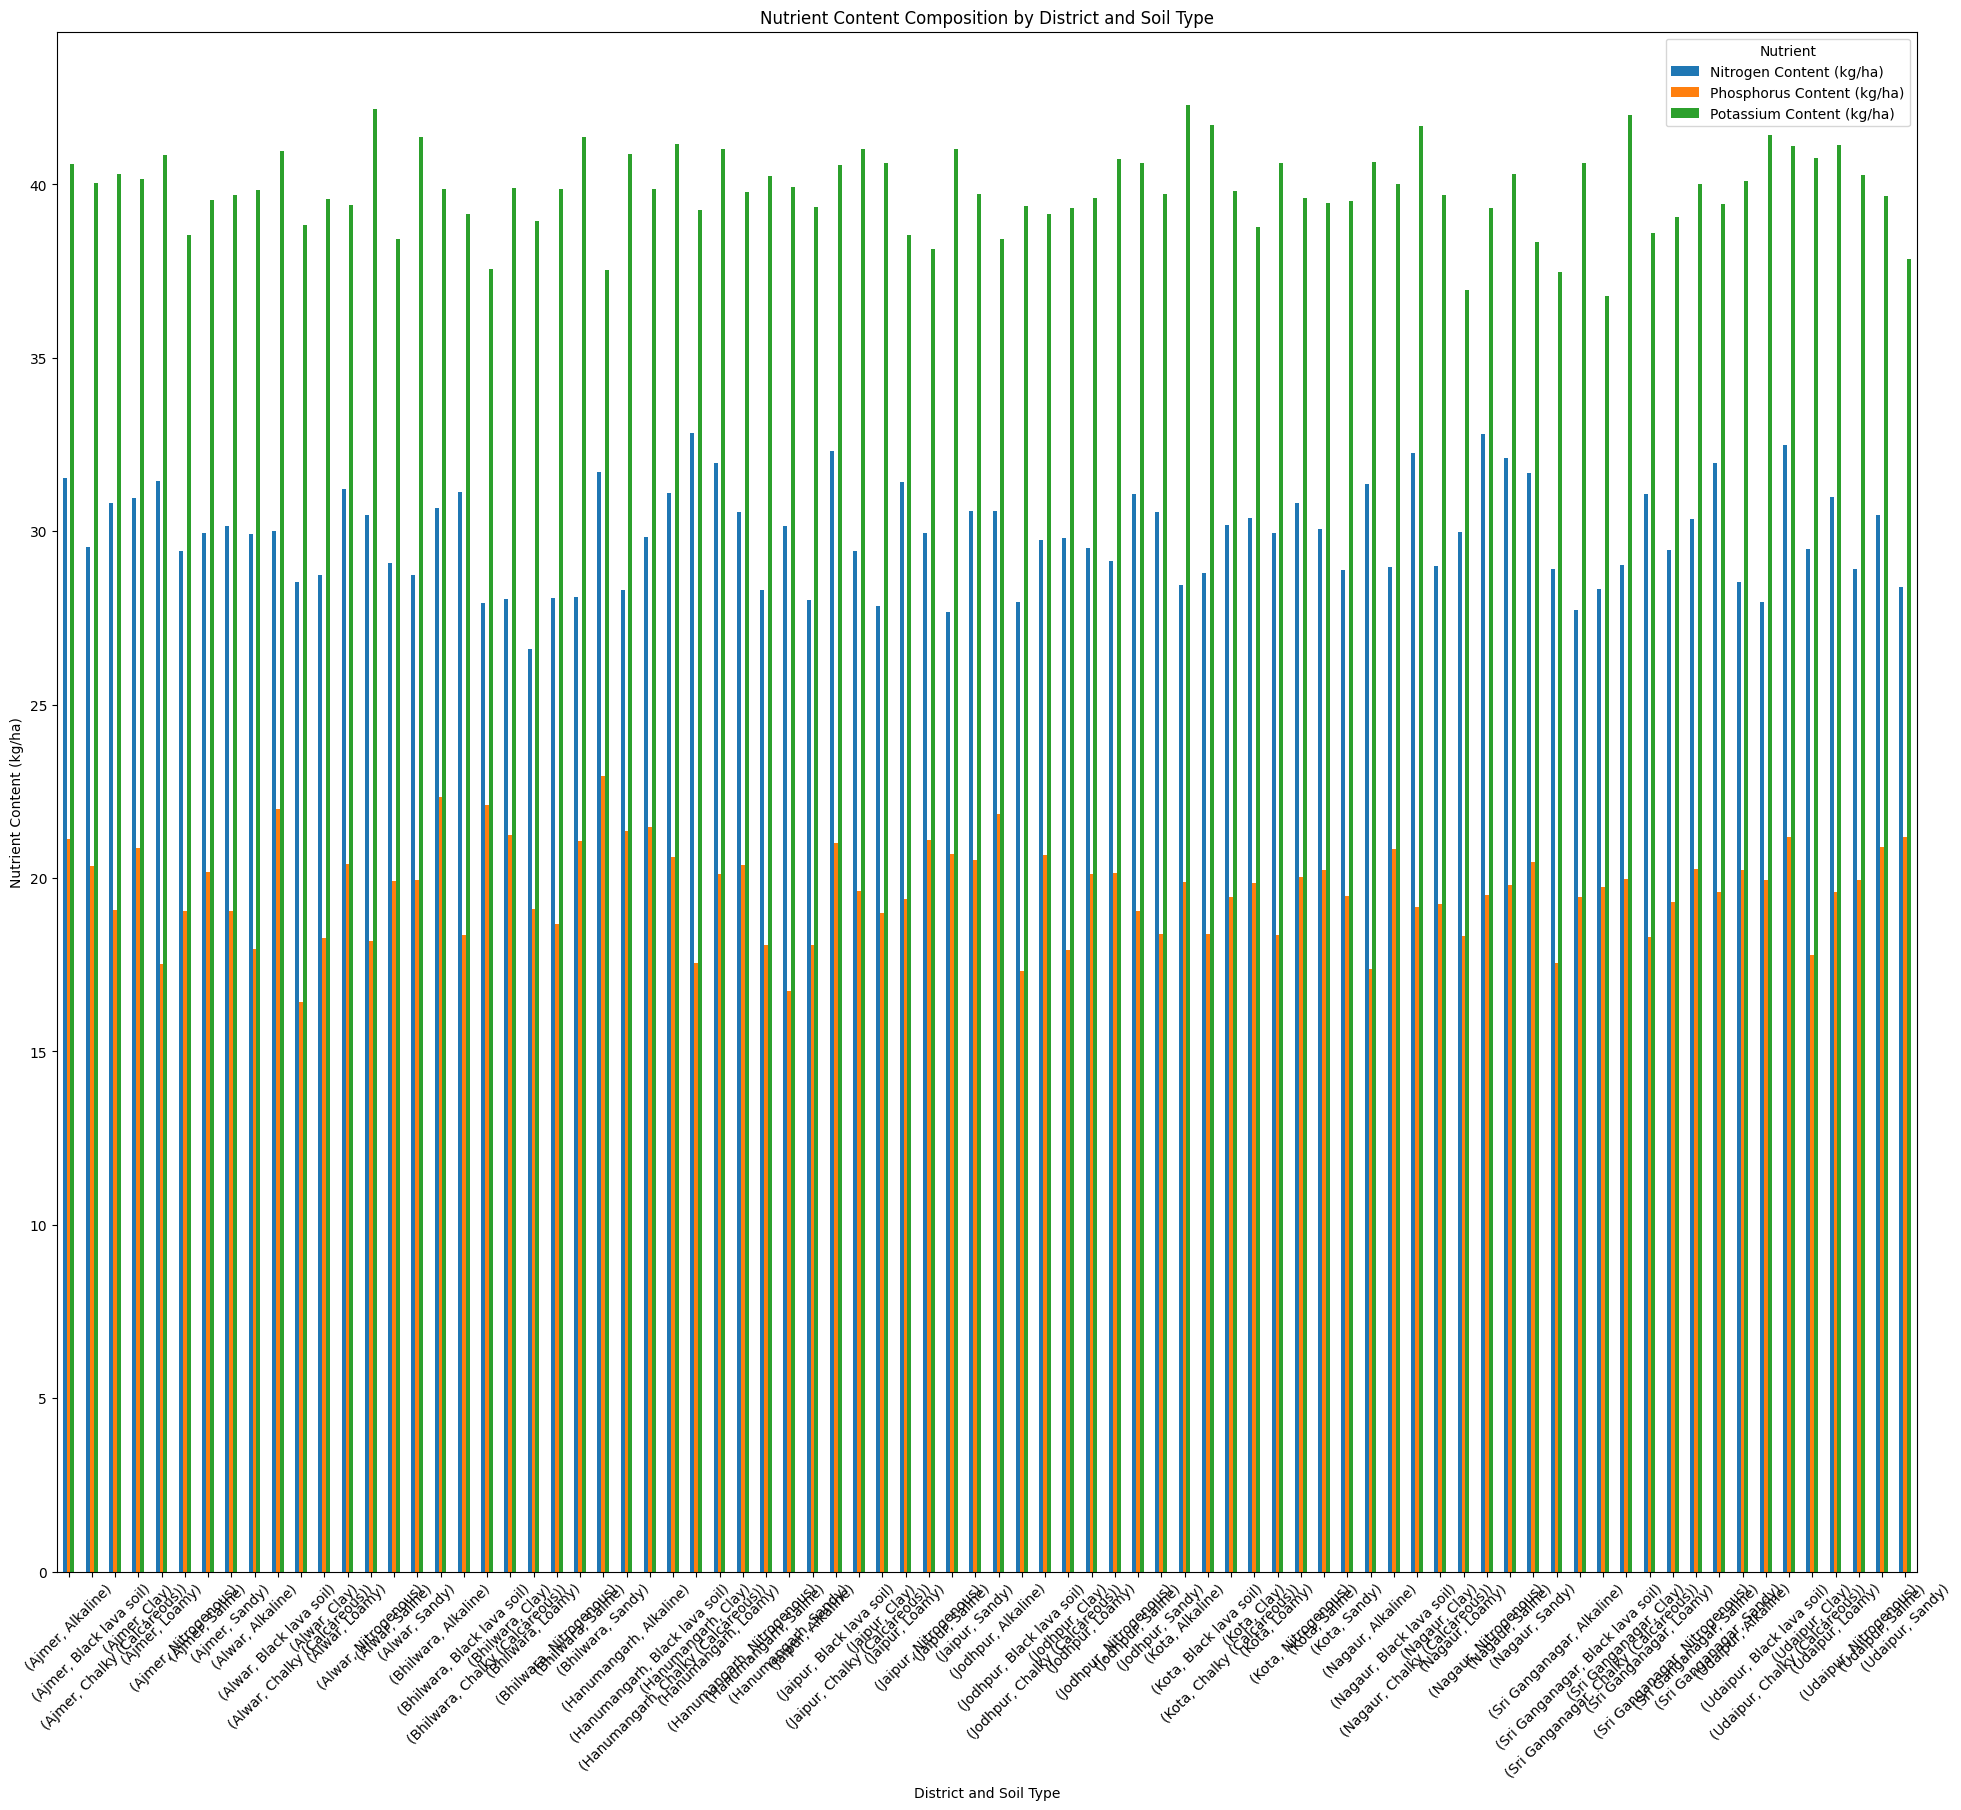

In [195]:
# Create a stacked bar plot
pivot_df.plot(kind='bar', stacked=False, figsize=(24, 20))
plt.title('Nutrient Content Composition by District and Soil Type')
plt.xlabel('District and Soil Type')
plt.ylabel('Nutrient Content (kg/ha)')
plt.legend(title='Nutrient')
plt.xticks(rotation=45)  # Keep the x-axis labels horizontal

plt.show()